This time with ArrayData structure.

Also includes design of the WC_24plate.

# Loading stuffs

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run nnn/ipynb_init.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
annotation_file = './data/annotation/NNNlib2b_annotation_20220519.tsv'
annotation = fileio.read_annotation(annotation_file)
replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')
replicate_df

name  replicate   chip                                           filename  \
0    r1     211022  Oct06  ./data/fitted_variant/NNNlib2b_DNA_20211022_v6...   
1    r2     211216  Nov11  ./data/fitted_variant/NNNlib2b_DNA_20211216_v9...   
2    r3     211221  Nov11  ./data/fitted_variant/NNNlib2b_DNA_20211221_v9...   
3   rev     211223  Nov11  ./data/fitted_variant/NNNlib2b_DNA_20211223_v9...   
4  salt     220314  Nov11  ./data/fitted_variant/NNNlib2b_DNA_20220314_v9...   

                                line_fit_filename  drop_last  reverse  sodium  \
0  ./data/fitted_variant/dG_fit_211022_v0.0.2.tsv      False    False   0.088   
1  ./data/fitted_variant/dG_fit_211216_v0.0.2.tsv      False    False   0.088   
2  ./data/fitted_variant/dG_fit_211221_v0.0.2.tsv       True    False   0.088   
3  ./data/fitted_variant/dG_fit_211223_v0.0.2.tsv       True     True   0.088   
4                                             NaN      False    False   0.163   

      notes  
0       NaN  
1       NaN  
2       NaN  
3  reversed  
4       NaN

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
80.98% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211022_v6.CPvariant.gz
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211216_v9.CPvariant.gz
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5

Combining dH

Combining Tm

Combining dG_37

Combining dS

Combining fmax

Combining fmin
39.48% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


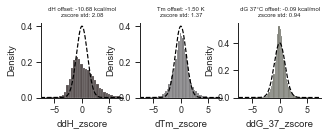

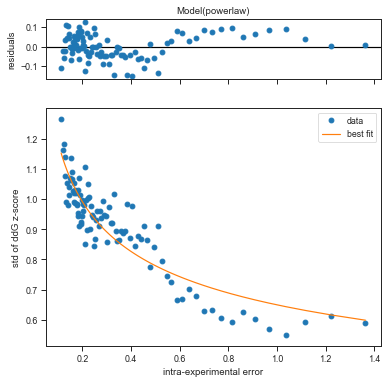

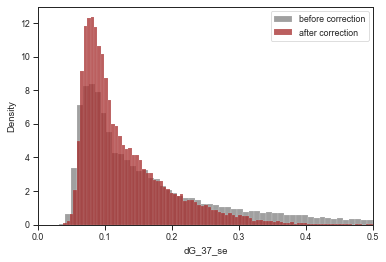

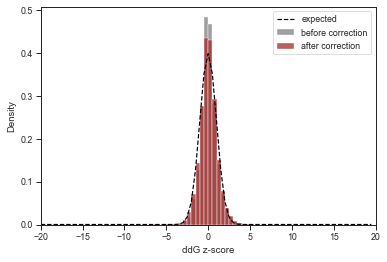

In [5]:
arraydata = ArrayData(replicate_df=replicate_df.iloc[:3,:],
                      annotation_file=annotation_file,
                      learn_error_adjust_from=('r1', 'r2'))
saltdata = ArrayData(replicate_df=replicate_df.iloc[4,:],
                    annotation_file=annotation_file)

# Figure 2

## Preprocess df a bit

In [9]:
arr = arraydata.data.join(arraydata.annotation)
# for param in ['dG_37', 'dG_37_lb', 'dG_37_ub']:
#     arr[f'd{param}'] = util.get_ddX(arr, param, 'ConstructType')
# arr['ddG_37_NUPACK_salt_corrected'] = util.get_ddX(arr, 'dG_37_NUPACK_salt_corrected', 'ConstructType')
arr['scaffold'] =arr.apply(lambda row: f'{row.bottomScaffold}_{row.topScaffold}', axis=1)

In [11]:
salt = saltdata.data.join(saltdata.annotation)
# for param in ['dG_37', 'dG_37_lb', 'dG_37_ub']:
#     salt[f'd{param}'] = util.get_ddX(salt, param, 'ConstructType')
# salt['ddG_37_NUPACK_salt_corrected'] = util.get_ddX(salt, 'dG_37_NUPACK_salt_corrected', 'ConstructType')
# salt['ddG_37_NUPACK_150mM'] = util.get_ddX(salt, 'dG_37_NUPACK_150mM', 'ConstructType')
salt['scaffold'] = salt.apply(lambda row: f'{row.bottomScaffold}_{row.topScaffold}', axis=1)

## Correlation with NUPACK

### Salt concentration and Pearson's r

In [ ]:
pearson, _ = pearsonr(series_df[param+suffix], series_df[param])

### Scatter overlaid with kde

Series MisMatches,  3300 variants
Series Bulges,  2366 variants
Series TETRAloop,  1681 variants
Series WatsonCrick,  646 variants
Series TRIloop,  450 variants
Series Control,  24 variants
Series MisMatches,  3300 variants
Series Bulges,  2366 variants
Series TETRAloop,  1681 variants
Series WatsonCrick,  646 variants
Series TRIloop,  450 variants
Series Control,  24 variants


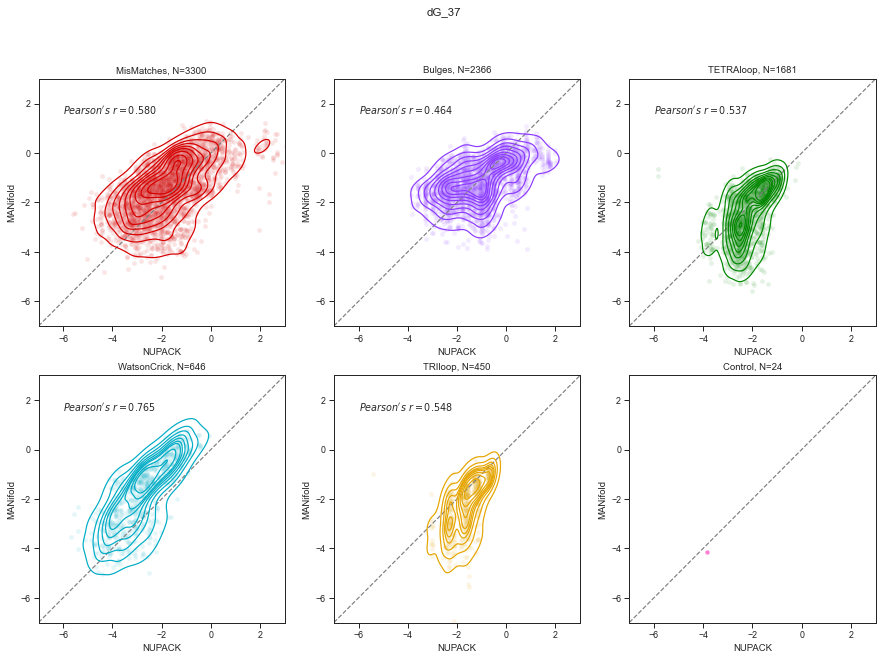

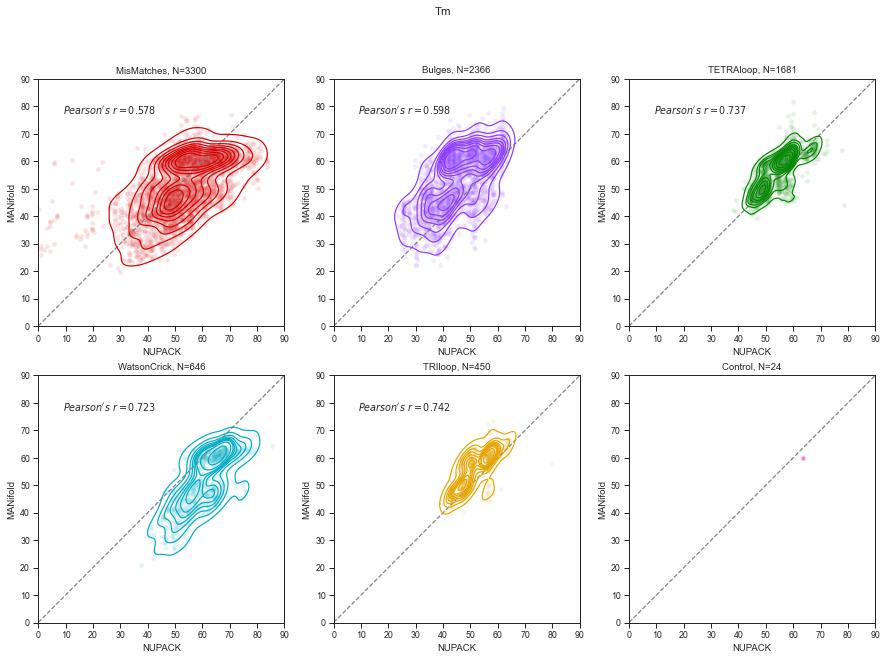

In [81]:
plotting.plot_comparison_by_series(salt, 'dG_37', lim=[-7,3])
util.save_fig('./fig/high_salt/nupack_corr_dG_37_150mM.pdf')

plotting.plot_comparison_by_series(salt, 'Tm', lim=[0,90])
util.save_fig('./fig/high_salt/nupack_corr_Tm_150mM.pdf')

Series MisMatches,  3300 variants
Series Bulges,  2366 variants
Series TETRAloop,  1681 variants
Series WatsonCrick,  646 variants
Series TRIloop,  450 variants
Series Control,  24 variants


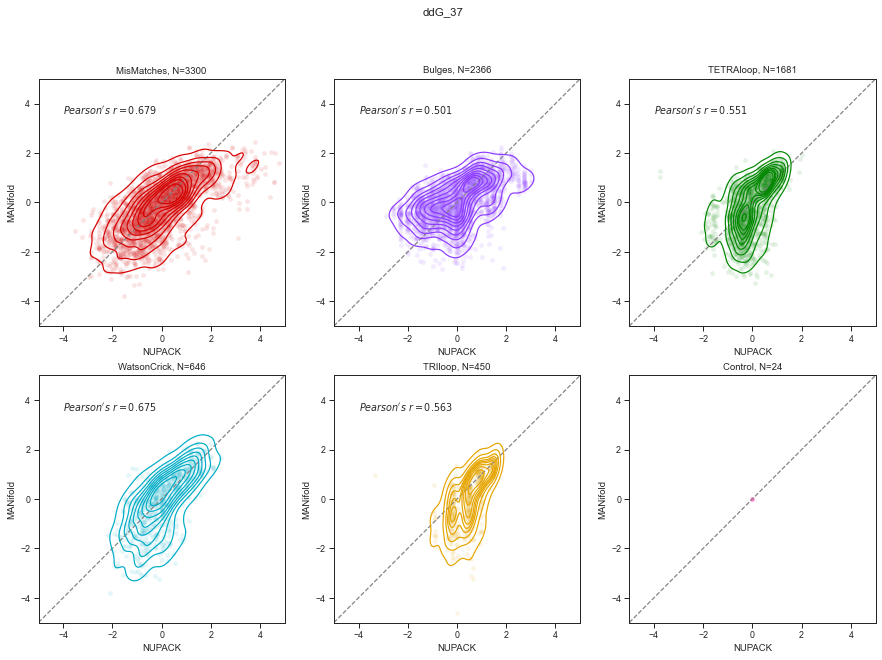

In [82]:
plotting.plot_comparison_by_series(salt, 'ddG_37', suffix='_NUPACK_salt_corrected', lim=[-5,5])
util.save_fig('./fig/high_salt/nupack_corr_ddG_37_150mM_by_series.pdf')

Construct Type WC_5ntstem,  408 variants
Construct Type WC_6ntstem,  180 variants
Construct Type WC_7ntstem,  58 variants
Construct Type AC_mismatch_varpos,  1054 variants
Construct Type Centered,  944 variants
Construct Type GT_mismatch_varpos,  683 variants
Construct Type 3mer,  619 variants
Construct Type NNN_5prime_bulge,  1131 variants
Construct Type NNN_3primebulge,  1040 variants
Construct Type NN_5primebulge,  113 variants
Construct Type NN_3primebulge,  82 variants
Construct Type NNN,  374 variants
Construct Type NN,  76 variants
Construct Type NNN,  1396 variants
Construct Type NN,  285 variants
Construct Type PUMcontrols,  11 variants
Construct Type WBcontrols,  3 variants
Construct Type BaeControls,  1 variants


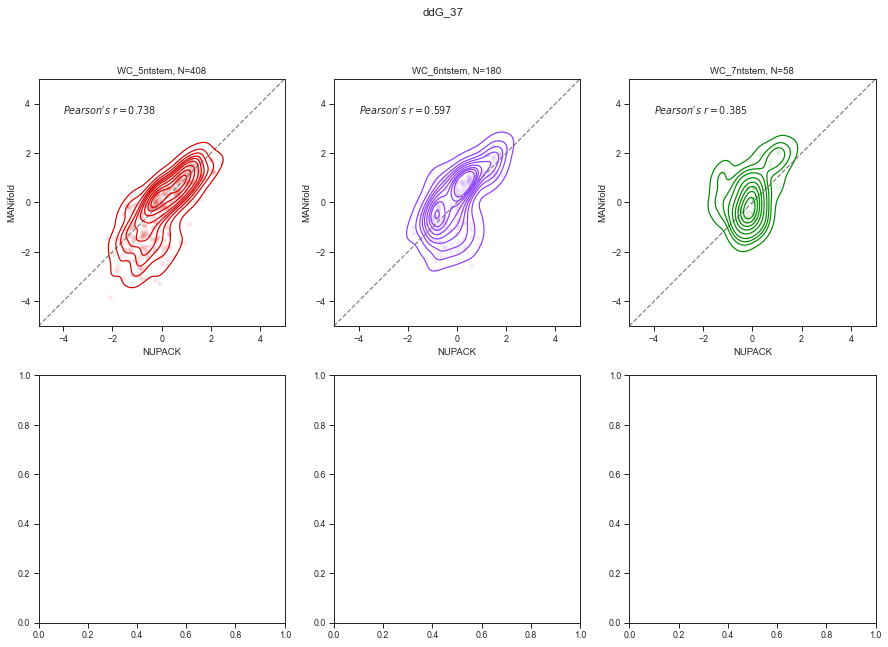

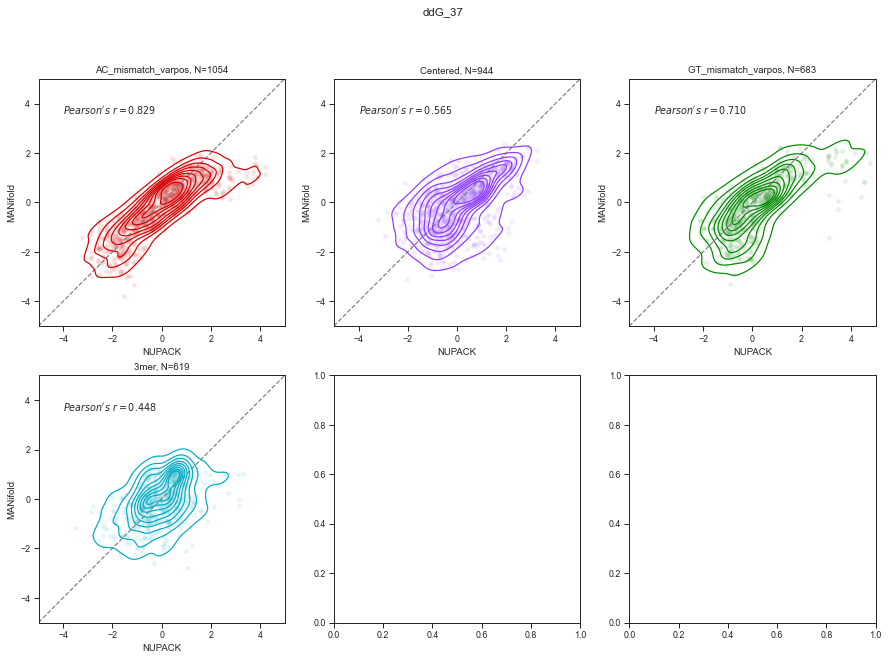

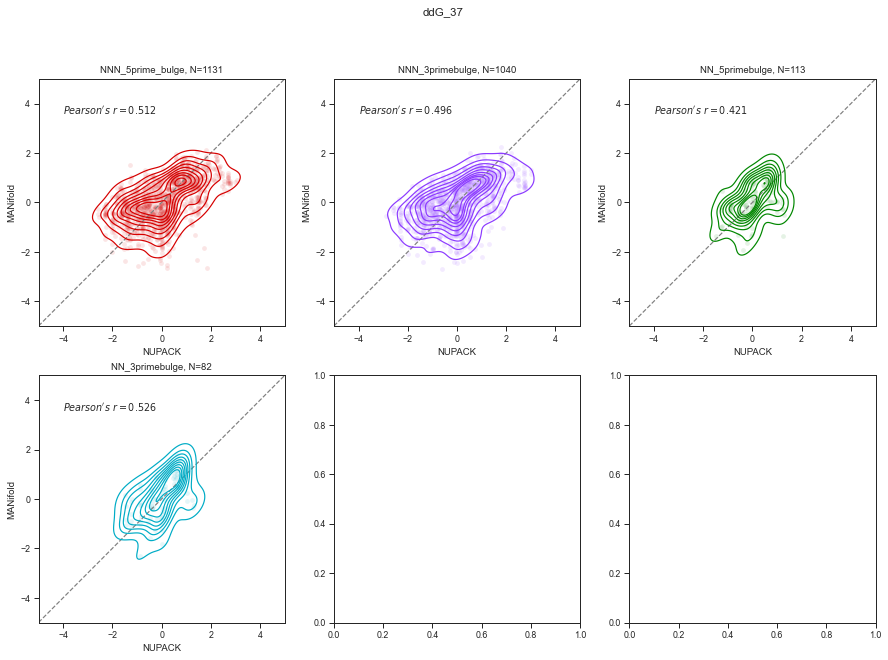

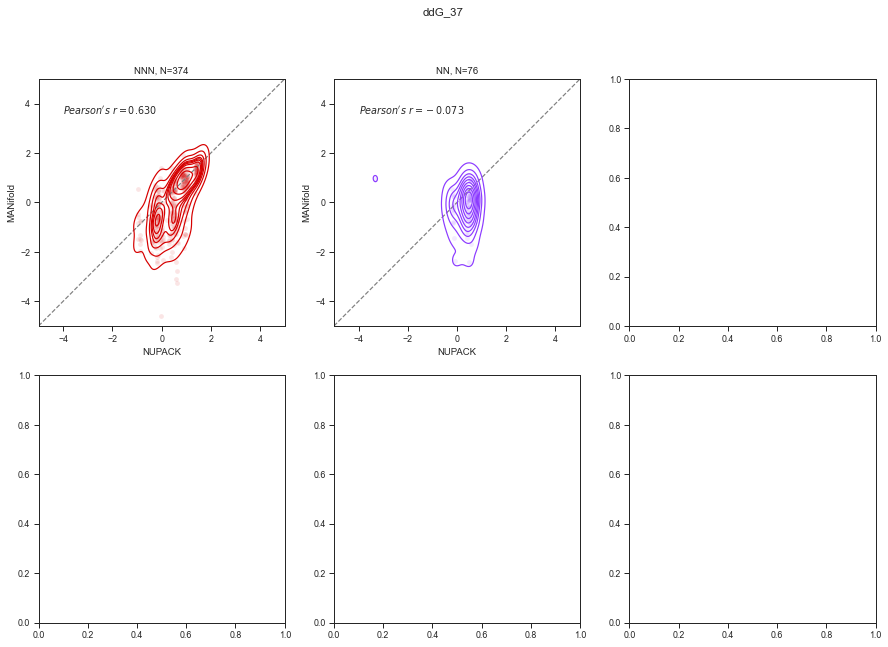

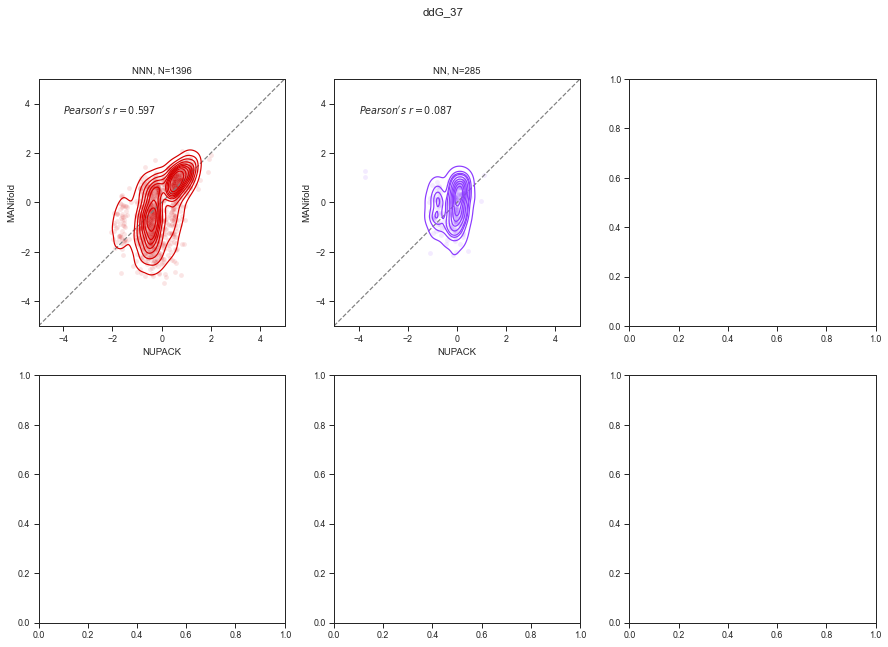

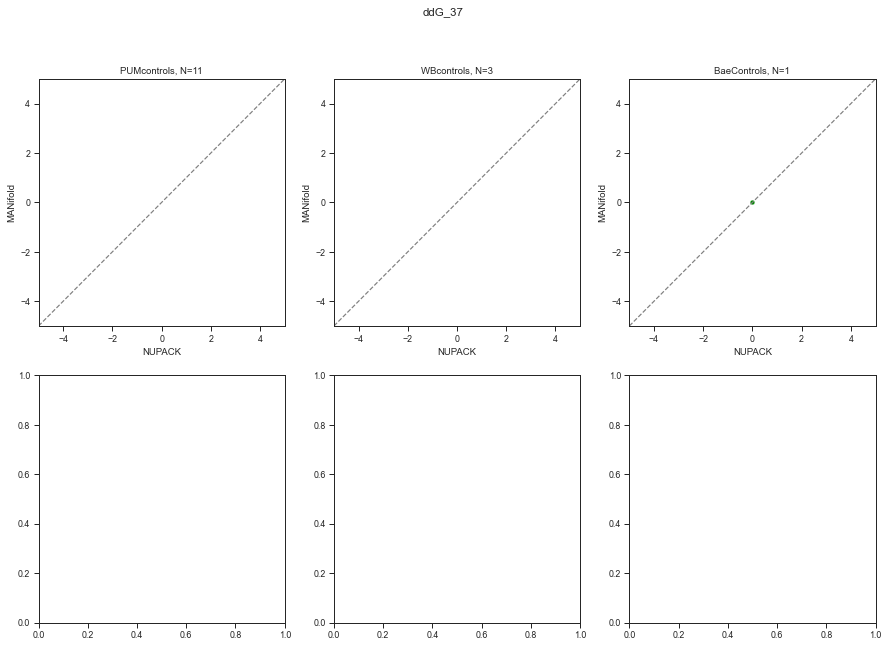

In [86]:
for series in ['WatsonCrick', 'MisMatches', 'Bulges', 'TRIloop', 'TETRAloop', 'External']:
    plotting.plot_comparison_by_type(salt, 'ddG_37', series=series, suffix='_NUPACK_salt_corrected', lim=[-5,5])

util.save_multi_image('./fig/high_salt/nupack_corr_ddG_37_150mM_by_construct_type.pdf')

Construct Type WC_5ntstem,  947 variants
Construct Type WC_6ntstem,  908 variants
Construct Type WC_7ntstem,  889 variants
Construct Type Centered,  2794 variants
Construct Type GT_mismatch_varpos,  1680 variants
Construct Type AC_mismatch_varpos,  1672 variants
Construct Type NNN_3primebulge,  2377 variants
Construct Type NNN_5prime_bulge,  2363 variants
Construct Type NN_3primebulge,  238 variants
Construct Type NN_5primebulge,  236 variants
Construct Type NNN,  1023 variants
Construct Type NN,  416 variants
Construct Type NNN,  4073 variants
Construct Type NN,  1625 variants
Construct Type PUMcontrols,  9 variants
Construct Type BaeControls,  6 variants
Construct Type WBcontrols,  1 variants


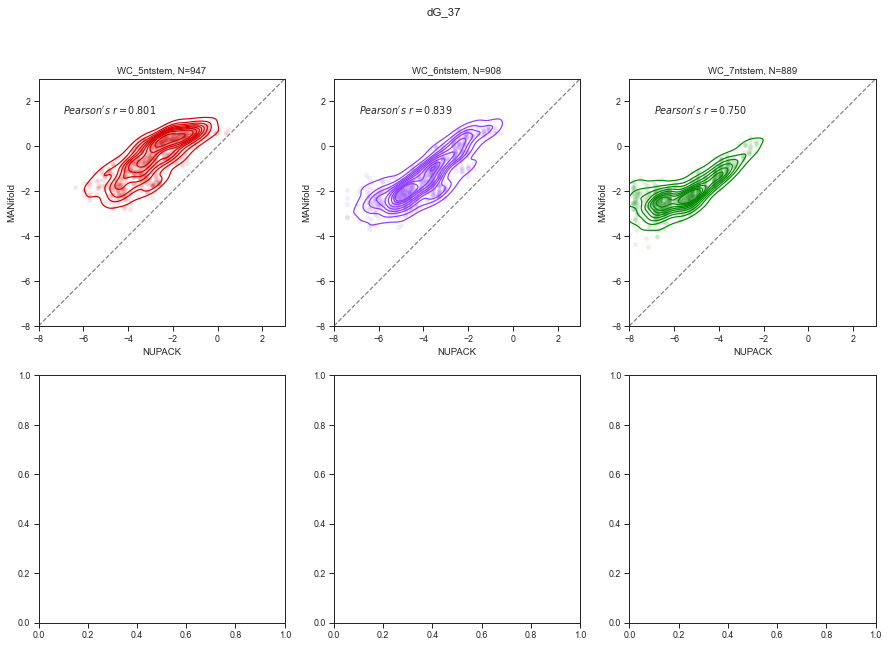

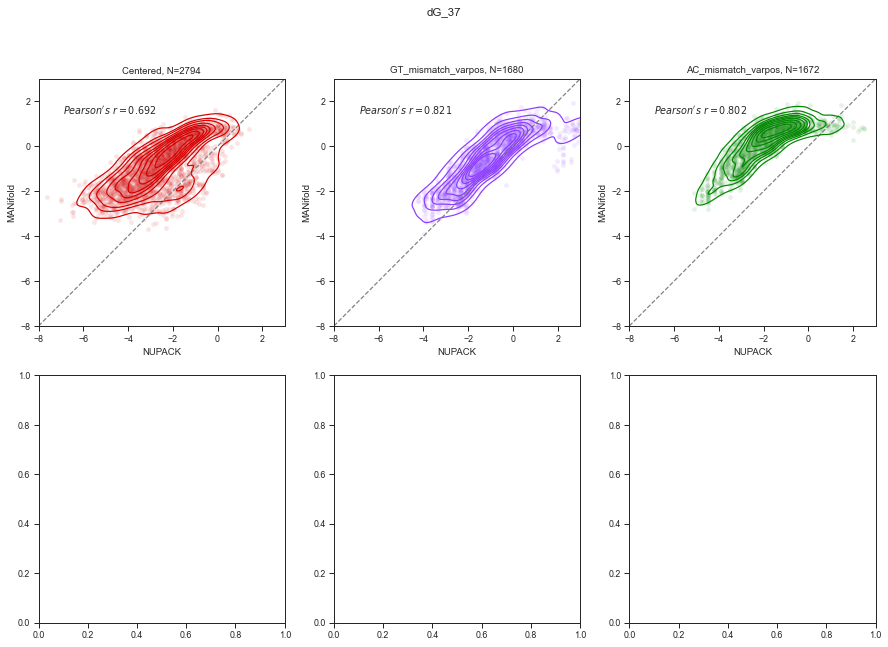

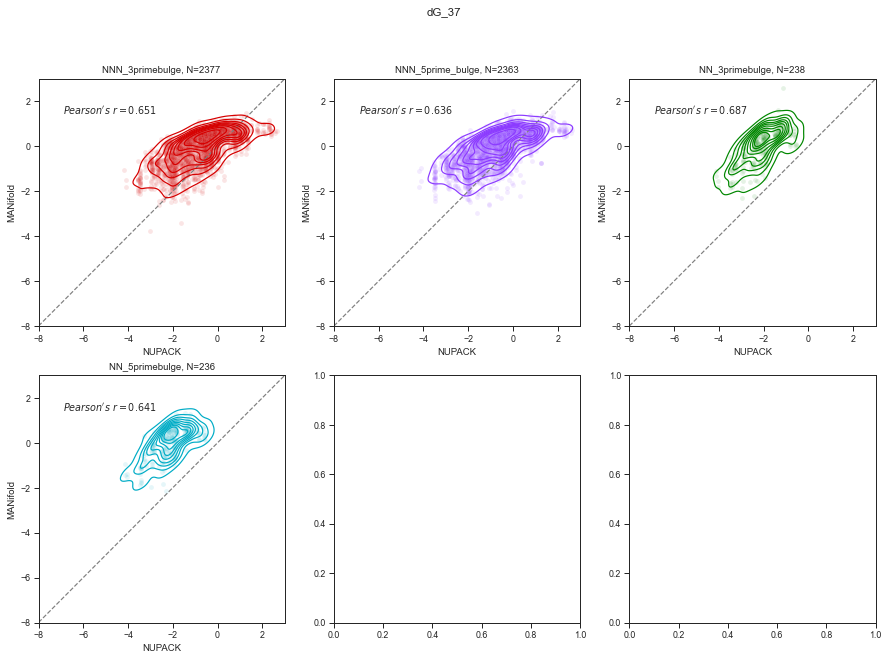

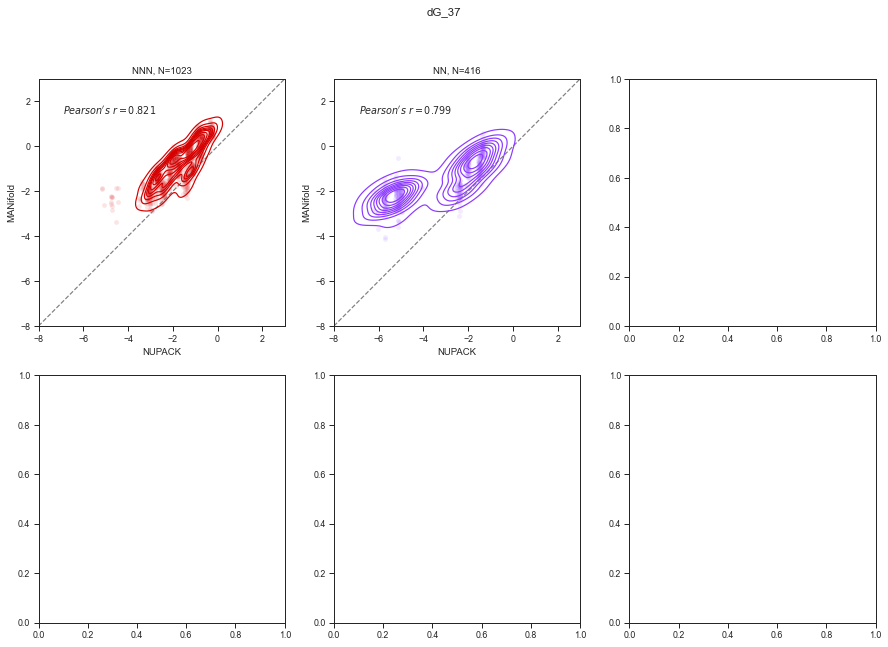

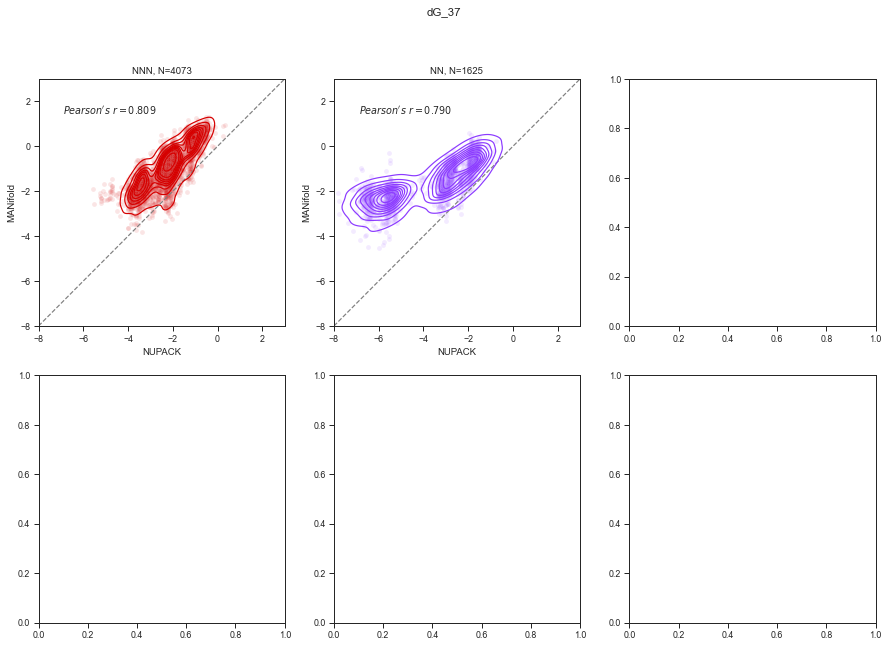

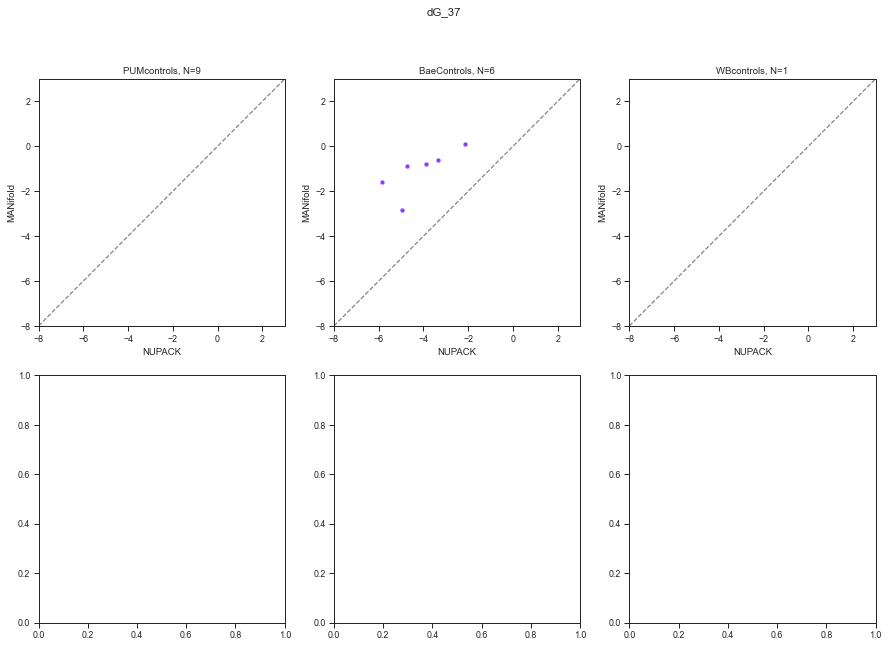

In [97]:
for series in ['WatsonCrick', 'MisMatches', 'Bulges', 'TRIloop', 'TETRAloop', 'External']:
    plotting.plot_comparison_by_type(arr, 'dG_37', series=series, suffix='_NUPACK_salt_corrected', lim=[-8,3])

util.save_multi_image('./fig/high_salt/nupack_corr_dG_37_75mM_by_construct_type.pdf')

Construct Type WC_5ntstem,  408 variants
Construct Type WC_6ntstem,  180 variants
Construct Type WC_7ntstem,  58 variants
Construct Type AC_mismatch_varpos,  1054 variants
Construct Type Centered,  944 variants
Construct Type GT_mismatch_varpos,  683 variants
Construct Type 3mer,  619 variants
Construct Type NNN_5prime_bulge,  1131 variants
Construct Type NNN_3primebulge,  1040 variants
Construct Type NN_5primebulge,  113 variants
Construct Type NN_3primebulge,  82 variants
Construct Type NNN,  374 variants
Construct Type NN,  76 variants
Construct Type NNN,  1396 variants
Construct Type NN,  285 variants
Construct Type PUMcontrols,  11 variants
Construct Type WBcontrols,  3 variants
Construct Type BaeControls,  1 variants


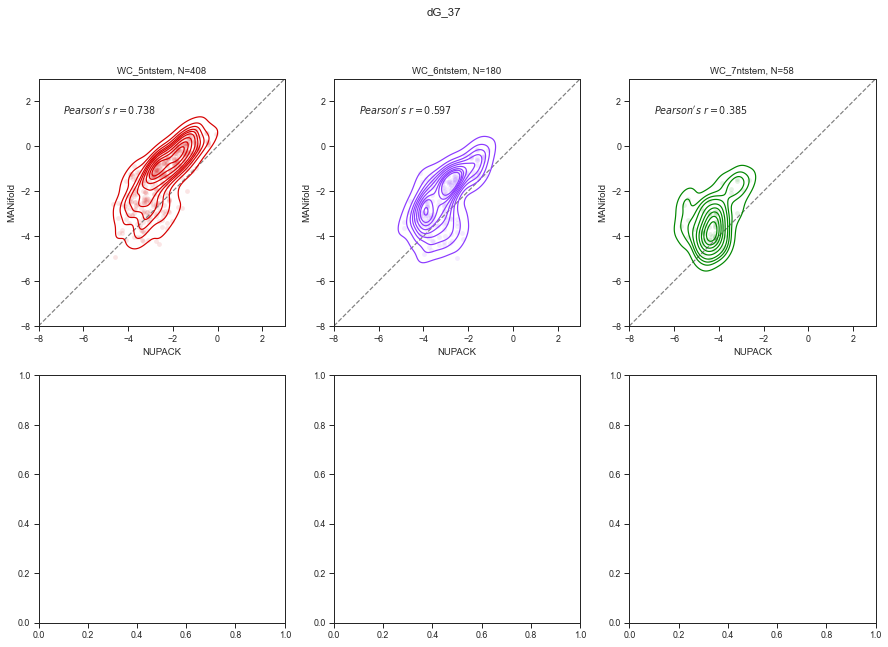

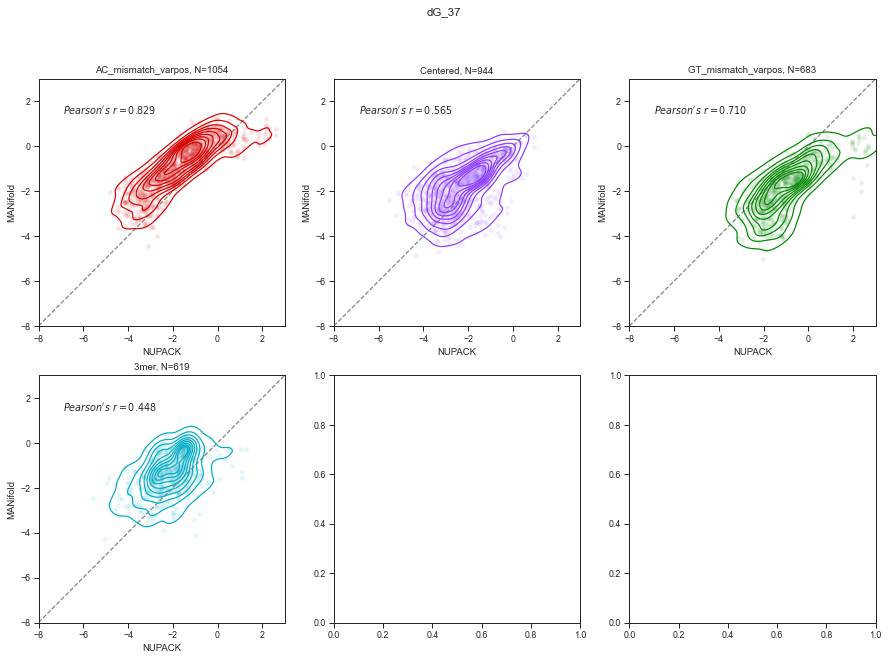

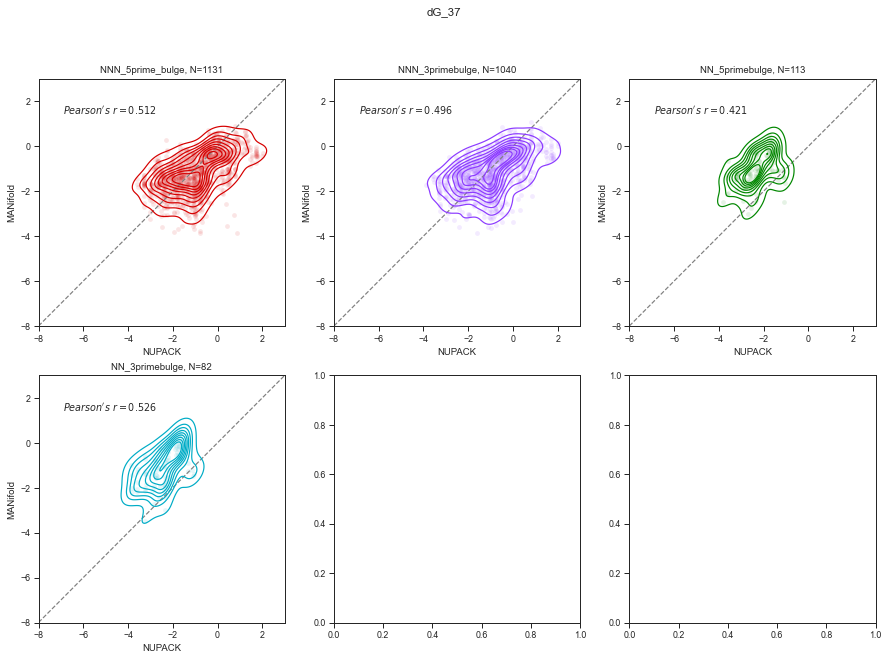

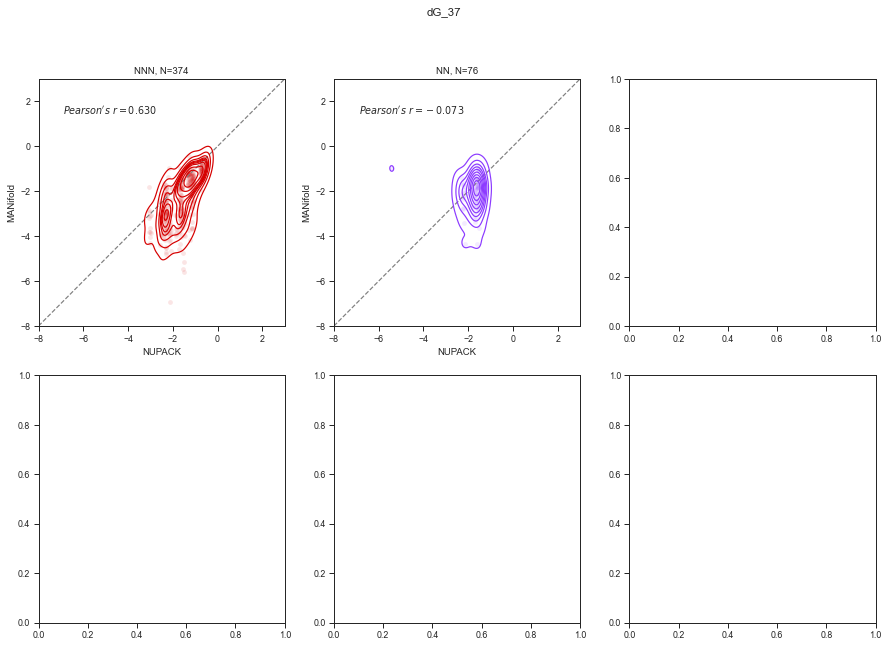

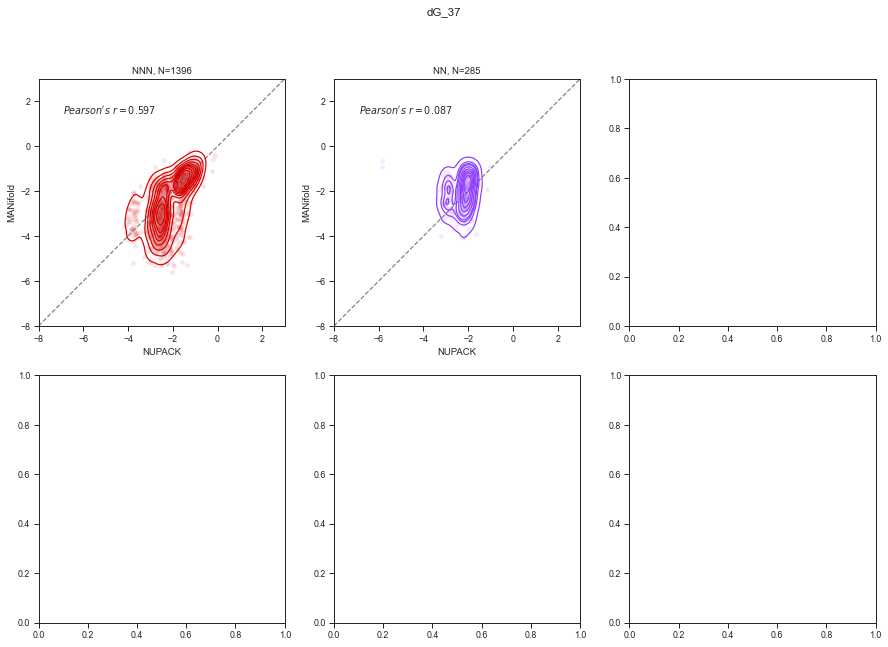

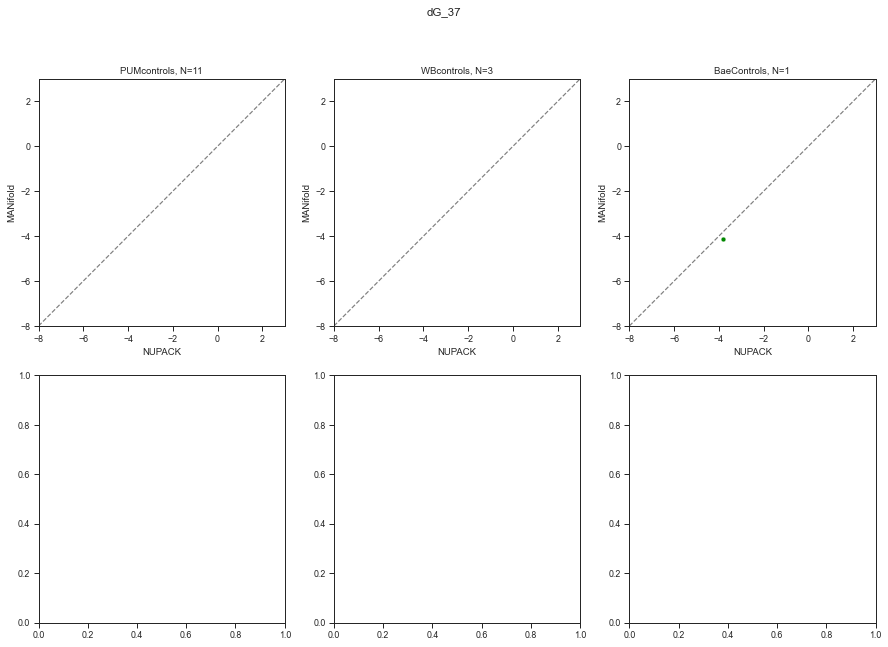

In [98]:
for series in ['WatsonCrick', 'MisMatches', 'Bulges', 'TRIloop', 'TETRAloop', 'External']:
    plotting.plot_comparison_by_type(salt, 'dG_37', series=series, suffix='_NUPACK_salt_corrected', lim=[-8,3])

util.save_multi_image('./fig/high_salt/nupack_corr_dG_37_150mM_by_construct_type.pdf')

Construct Type WC_5ntstem,  947 variants
Construct Type WC_6ntstem,  908 variants
Construct Type WC_7ntstem,  889 variants
Construct Type Centered,  2794 variants
Construct Type GT_mismatch_varpos,  1680 variants
Construct Type AC_mismatch_varpos,  1672 variants
Construct Type NNN_3primebulge,  2377 variants
Construct Type NNN_5prime_bulge,  2363 variants
Construct Type NN_3primebulge,  238 variants
Construct Type NN_5primebulge,  236 variants
Construct Type NNN,  1023 variants
Construct Type NN,  416 variants
Construct Type NNN,  4073 variants
Construct Type NN,  1625 variants
Construct Type PUMcontrols,  9 variants
Construct Type BaeControls,  6 variants
Construct Type WBcontrols,  1 variants


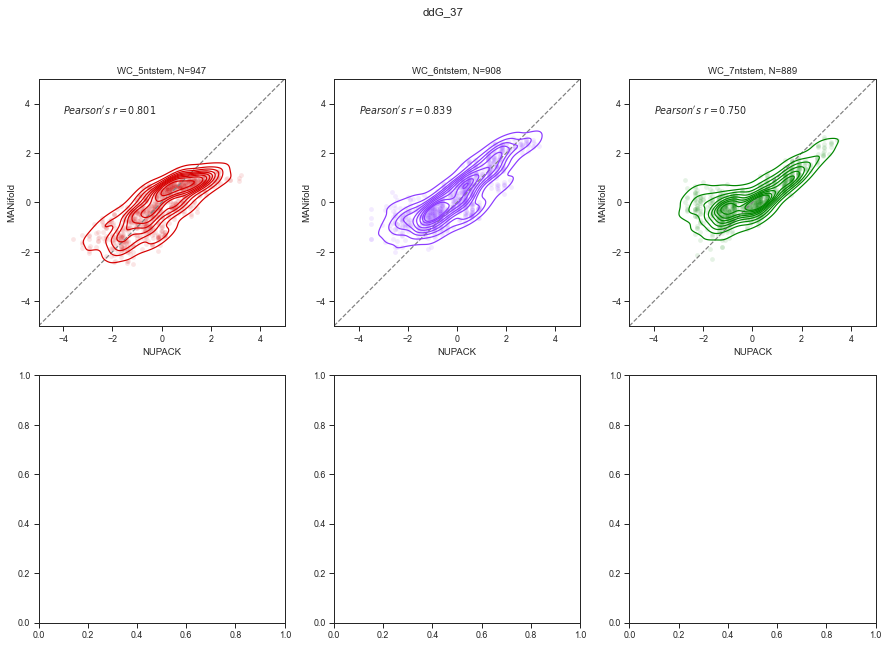

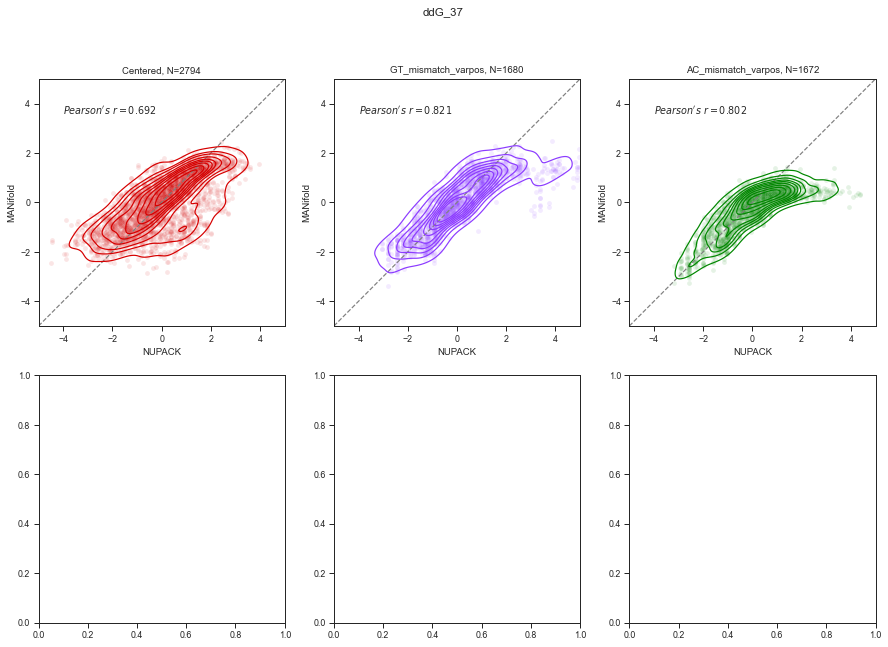

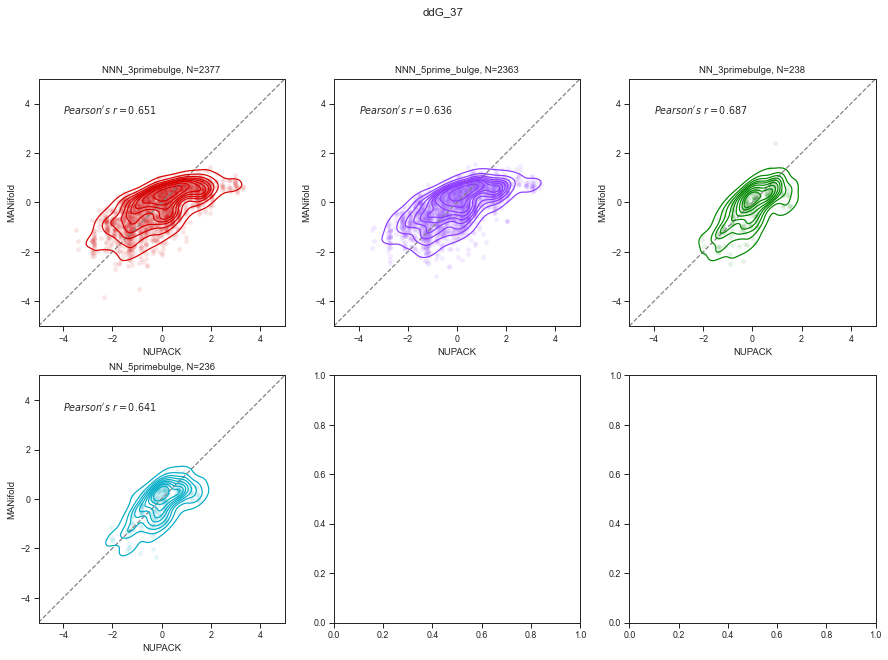

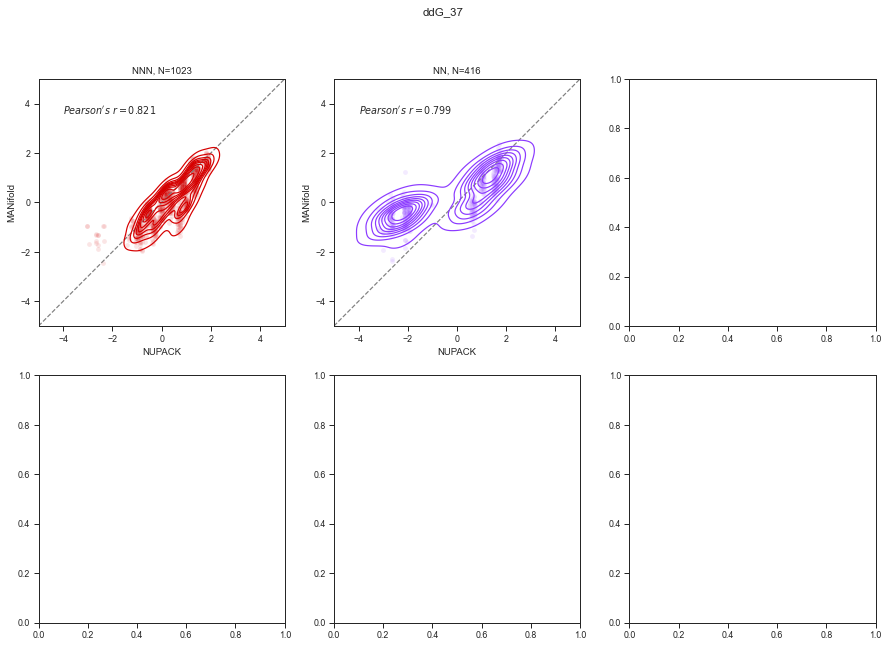

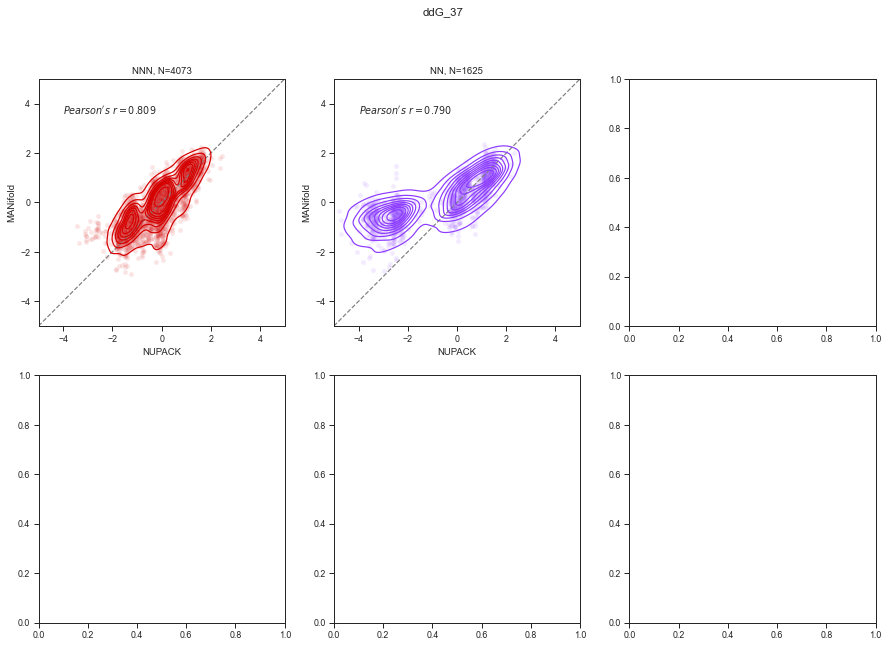

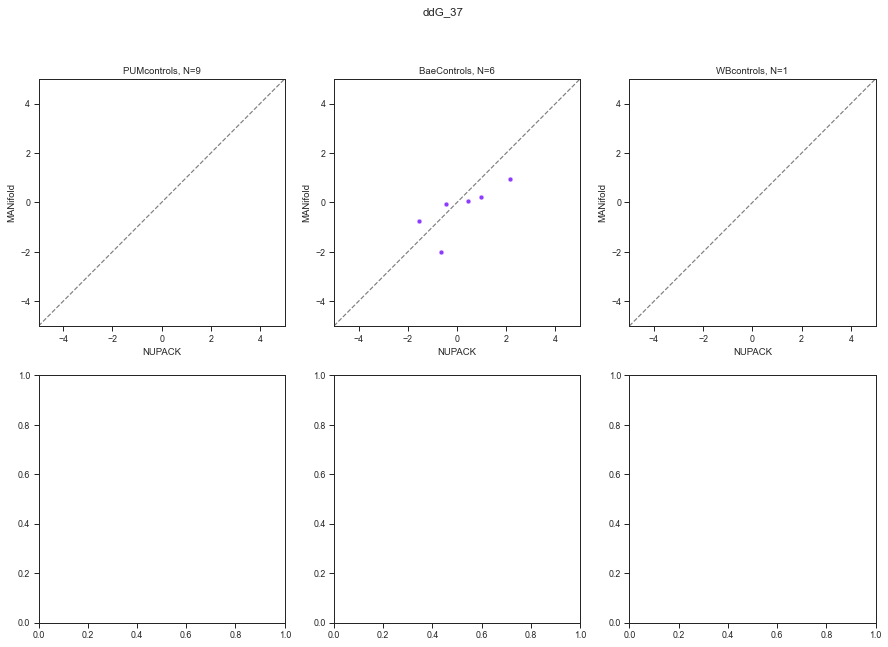

In [93]:
for series in ['WatsonCrick', 'MisMatches', 'Bulges', 'TRIloop', 'TETRAloop', 'External']:
    plotting.plot_comparison_by_type(arr, 'ddG_37', series=series, suffix='_NUPACK_salt_corrected', lim=[-5,5])

util.save_multi_image('./fig/high_salt/nupack_corr_ddG_37_75mM_by_construct_type.pdf')

### scatter colored by kde

Let's make some colorpalettes for Fig.2B

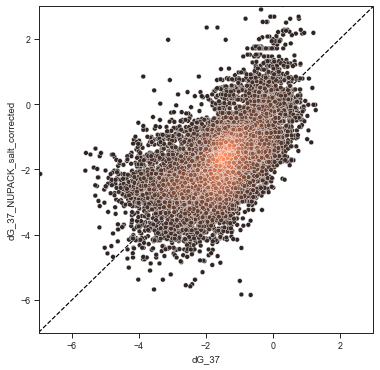

In [216]:
palette = sns.dark_palette(sns.color_palette('Set2', 4)[1], reverse=False, as_cmap=True)

plotting.plot_colored_scatter_comparison(data=salt, x='dG_37', y='dG_37_NUPACK_salt_corrected', lim=[-7,3], alpha=1, palette=palette)

Scatterplot time!

Series WatsonCrick,  646 variants
Series Hairpin Loops,  2131 variants
Series Bulges,  2366 variants
Series MisMatches,  3300 variants
Series WatsonCrick,  646 variants
Series Hairpin Loops,  2131 variants
Series Bulges,  2366 variants
Series MisMatches,  3300 variants
Series WatsonCrick,  646 variants
Series Hairpin Loops,  2131 variants
Series Bulges,  2366 variants
Series MisMatches,  3300 variants
Series WatsonCrick,  646 variants
Series Hairpin Loops,  2131 variants
Series Bulges,  2366 variants
Series MisMatches,  3300 variants


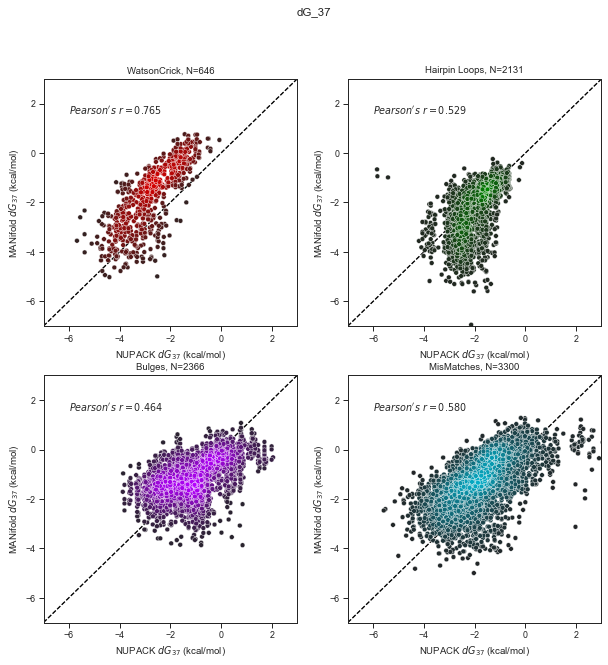

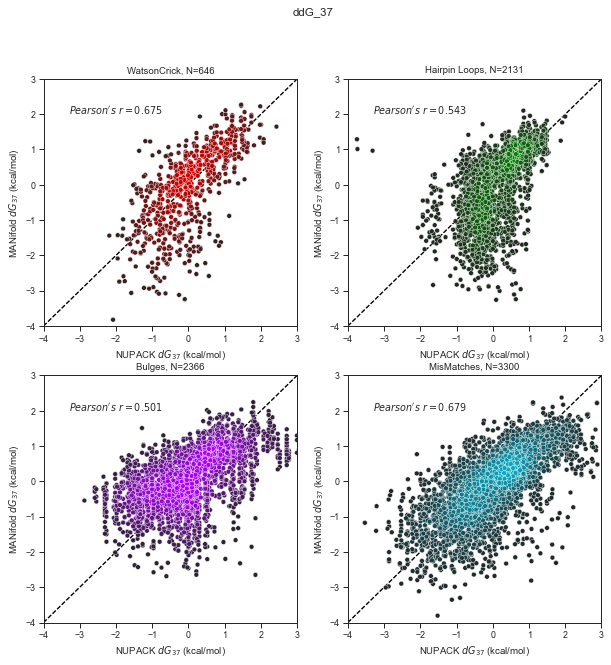

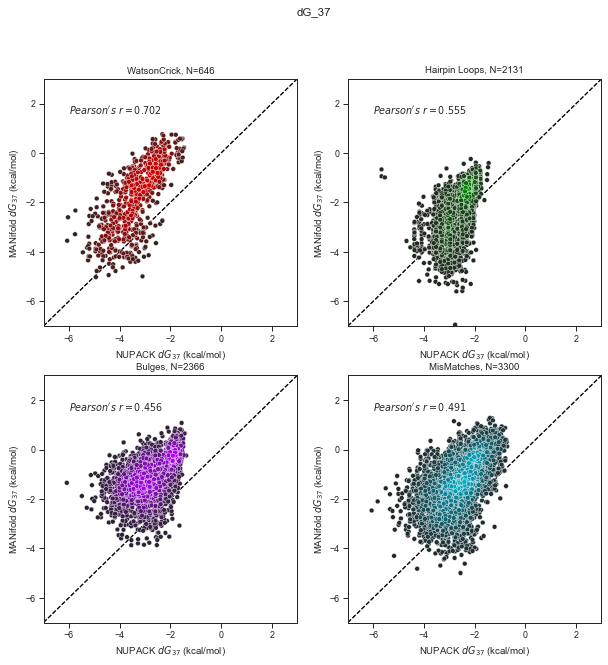

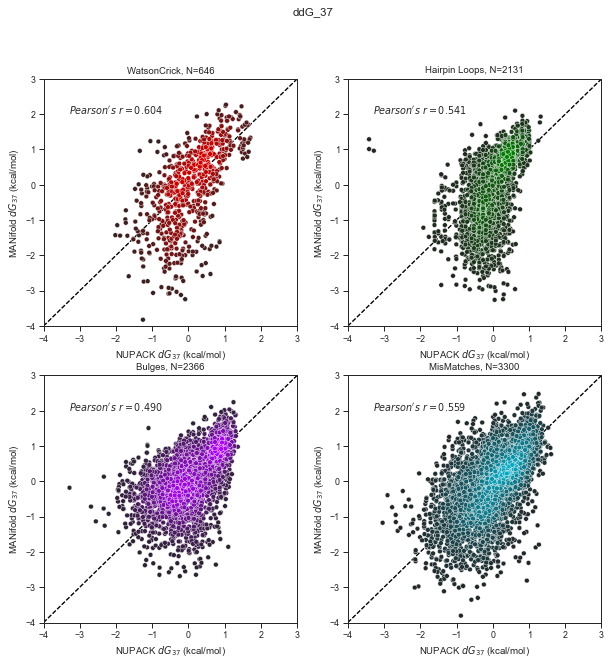

In [223]:
plotting.plot_comparison_by_series(salt, 'dG_37', suffix='_NUPACK_salt_corrected', lim=[-7,3])
util.save_fig('./fig/Fig2/Fig2B_150mM_dG_37_scatter_NUPACK_salt_corrected_2_state.pdf')

plotting.plot_comparison_by_series(salt, 'ddG_37', suffix='_NUPACK_salt_corrected', lim=[-4,3])
util.save_fig('./fig/Fig2/Fig2B_150mM_ddG_37_scatter_NUPACK_salt_corrected_2_state.pdf')

plotting.plot_comparison_by_series(salt, 'dG_37', suffix='_NUPACK_150mM', lim=[-7,3])
util.save_fig('./fig/Fig2/Fig2B_150mM_dG_37_scatter_NUPACK_pfunc.pdf')

plotting.plot_comparison_by_series(salt, 'ddG_37', suffix='_NUPACK_150mM', lim=[-4,3])
util.save_fig('./fig/Fig2/Fig2B_150mM_ddG_37_scatter_NUPACK_pfunc.pdf')

Series WatsonCrick,  2744 variants
Series Bulges,  5214 variants
Series MisMatches,  6146 variants
Series Hairpin Loops,  7137 variants
Series WatsonCrick,  2744 variants
Series Bulges,  5214 variants
Series MisMatches,  6146 variants
Series Hairpin Loops,  7137 variants


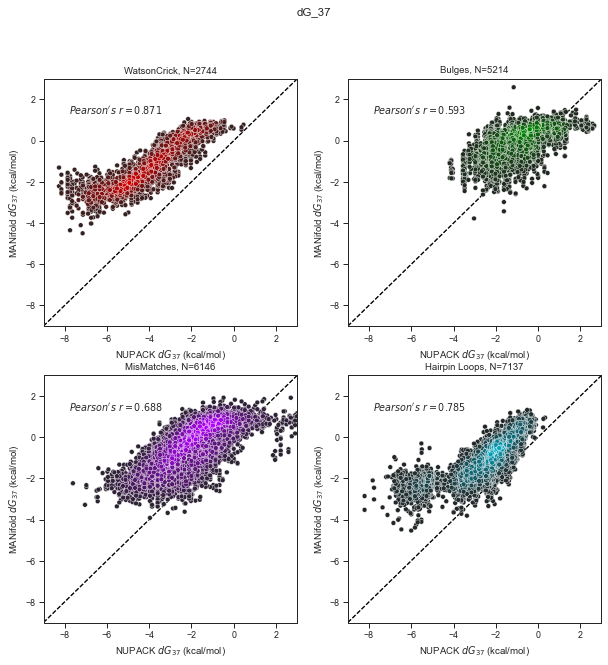

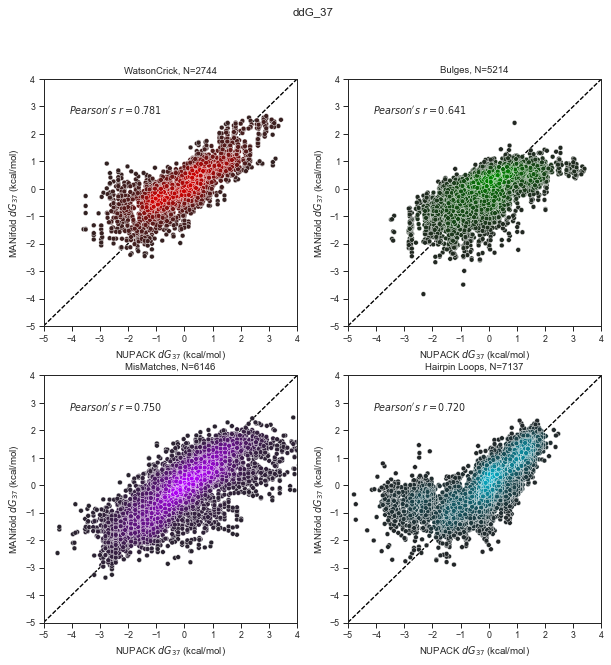

In [113]:
plotting.plot_comparison_by_series(arr, 'dG_37', suffix='_NUPACK_salt_corrected', lim=[-9,3])
util.save_fig('./fig/Fig2/Fig2B_75mM_dG_37_scatter_NUPACK_salt_corrected_2_state.pdf')

plotting.plot_comparison_by_series(arr, 'ddG_37', suffix='_NUPACK_salt_corrected', lim=[-5,4])
util.save_fig('./fig/Fig2/Fig2B_75mM_ddG_37_scatter_NUPACK_salt_corrected_2_state.pdf')

# plotting.plot_comparison_by_series(salt, 'dG_37', suffix='_NUPACK_150mM', lim=[-7,3])
# util.save_fig('./fig/Fig2/Fig2B_dG_37_scatter_NUPACK_150mM_pfunc.pdf')

# plotting.plot_comparison_by_series(salt, 'ddG_37', suffix='_NUPACK_150mM', lim=[-4,3])
# util.save_fig('./fig/Fig2/Fig2B_ddG_37_scatter_NUPACK_150mM_pfunc.pdf')

## ddG with NUPACK

### Similarity score

In [318]:
def add_ddG_37_nupack_norm(df):
    df['ddG_37_nupack_norm'] = (df.dG_37_NUPACK_salt_corrected - df.dG_37) / df.dG_37_se
    df['dddG_37_nupack_norm'] = (df.ddG_37_NUPACK_salt_corrected - df.ddG_37) / df.dG_37_se

    
add_ddG_37_nupack_norm(arr)
add_ddG_37_nupack_norm(salt)

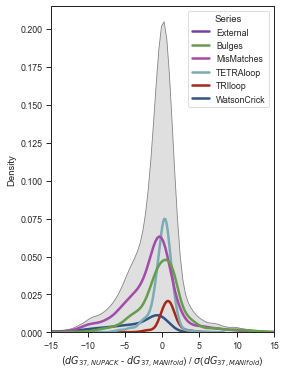

In [337]:
from scipy.stats import norm
# sns.histplot(arr.ddG_37_nupack_norm, stat='density')
fig, ax = plt.subplots(figsize=(4,6))
l = 15
bins = np.arange(-l, l, 0.5)
# plt.plot(bins, norm.pdf(bins, 0, 1), 'k--')
sns.kdeplot(salt.ddG_37_nupack_norm,  color='gray', fill=True)
sns.kdeplot(data=salt.query('Series != "Control"'), x='ddG_37_nupack_norm', hue='Series', palette='cet_glasbey_dark_r', linewidth=2.5)

plt.xlabel('$(dG_{37,NUPACK}$ - $dG_{37,MANIfold}$) / $\sigma$($dG_{37,MANIfold}$)')
plt.xlim([-l,l])
util.save_fig('./fig/NUPACK/z_score_like_dG_37_comparison.pdf')

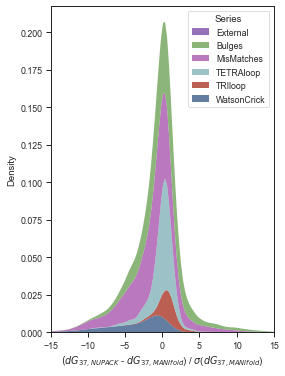

In [330]:
from scipy.stats import norm
# sns.histplot(arr.ddG_37_nupack_norm, stat='density')
fig, ax = plt.subplots(figsize=(4,6))
l = 15
sns.kdeplot(data=salt.query('Series != "Control"'), x='ddG_37_nupack_norm', hue='Series', multiple='stack', palette='cet_glasbey_dark_r', linewidth=0)

plt.xlabel('$(dG_{37,NUPACK}$ - $dG_{37,MANIfold}$) / $\sigma$($dG_{37,MANIfold}$)')
plt.xlim([-l,l])
util.save_fig('./fig/NUPACK/z_score_like_dG_37_comparison_stack.pdf')

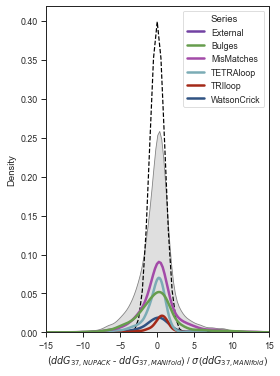

In [326]:
from scipy.stats import norm
# sns.histplot(arr.ddG_37_nupack_norm, stat='density')
fig, ax = plt.subplots(figsize=(4,6))
l = 15
bins = np.arange(-l, l, 0.5)
plt.plot(bins, norm.pdf(bins, 0, 1), 'k--')
sns.kdeplot(salt.dddG_37_nupack_norm,  color='gray', fill=True)
sns.kdeplot(data=salt.query('Series != "Control"'), x='dddG_37_nupack_norm', hue='Series', palette='cet_glasbey_dark_r', linewidth=2.5)

plt.xlabel('$(ddG_{37,NUPACK}$ - $ddG_{37,MANIfold}$) / $\sigma$($ddG_{37,MANIfold}$)')
plt.xlim([-l,l])
util.save_fig('./fig/NUPACK/z_score_like_ddG_37_comparison.pdf')

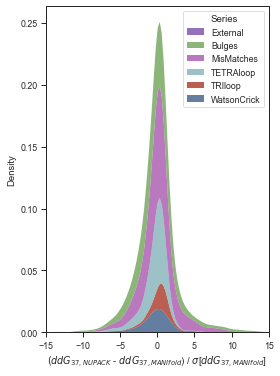

In [334]:
fig, ax = plt.subplots(figsize=(4,6))
l = 15
bins = np.arange(-l, l, 0.5)
# plt.plot(bins, norm.pdf(bins, 0, 1), 'k--')
sns.kdeplot(data=salt.query('Series != "Control"'), x='dddG_37_nupack_norm', hue='Series', multiple='stack', palette='cet_glasbey_dark_r', linewidth=0)

plt.xlabel('$(ddG_{37,NUPACK}$ - $ddG_{37,MANIfold}$) / $\sigma$[$ddG_{37,MANIfold}$]')
plt.xlim([-l,l])
util.save_fig('./fig/NUPACK/z_score_like_ddG_37_comparison_stack.pdf')

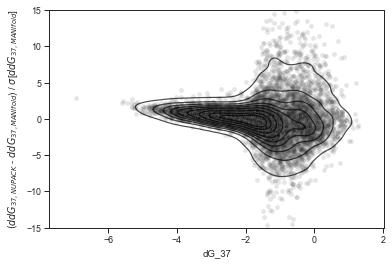

In [368]:
sns.scatterplot(data=salt.query('Series != "Control"'), y='dddG_37_nupack_norm', x='dG_37', alpha=.1, color='k')
sns.kdeplot(data=salt.query('Series != "Control"'), y='dddG_37_nupack_norm', x='dG_37', alpha=.7, color='k')
plt.ylabel('$(ddG_{37,NUPACK}$ - $ddG_{37,MANIfold}$) / $\sigma$[$ddG_{37,MANIfold}$]')
plt.ylim([-15,15])
util.save_fig('./fig/NUPACK/dddG_vs_dG.pdf')

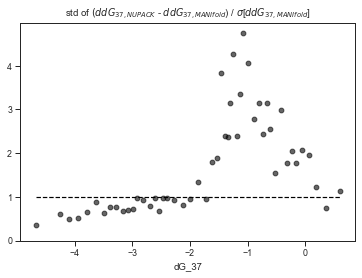

In [409]:
def calc_dddG_std(mydf, against):
    df = mydf.copy()
    df['bins'] = pd.qcut(df[against], 50)
    sigma_df = df[['dddG_37_nupack_norm', 'bins']].groupby('bins').apply(np.std).rename(columns={'dddG_37_nupack_norm':'dddG_37_score_std'})
    sigma_df[against] = [x.mid for x in sigma_df.index.values]
    plt.plot([sigma_df[against].min(), sigma_df[against].max()], [1,1], 'k--')
    plt.plot(sigma_df[against], sigma_df.dddG_37_score_std, 'ko', alpha=.6)
    
    plt.xlabel(against)
    plt.ylim(bottom=0)
    
    return sigma_df

sigma_df = calc_dddG_std(salt.query("Series == 'WatsonCrick'"), 'dG_37')
plt.title('std of $(ddG_{37,NUPACK}$ - $ddG_{37,MANIfold}$) / $\sigma$[$ddG_{37,MANIfold}$]')

util.save_fig('./fig/NUPACK/dddG_score_std_vs_dG_37_WC.pdf')

In [ ]:
_ = calc_dddG_std(salt, 'Tm')
plt.title('std of $(ddG_{37,NUPACK}$ - $ddG_{37,MANIfold}$) / $\sigma$[$ddG_{37,MANIfold}$]')
util.save_fig('./fig/NUPACK/dddG_score_std_vs_Tm.pdf')

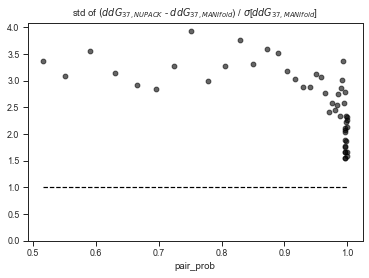

In [408]:
param = 'pair_prob'
_ = calc_dddG_std(salt, param)
plt.title('std of $(ddG_{37,NUPACK}$ - $ddG_{37,MANIfold}$) / $\sigma$[$ddG_{37,MANIfold}$]')
util.save_fig(f'./fig/NUPACK/dddG_score_std_vs_{param}.pdf')

### ddG binned on error

In [7]:
from nnn import figures

Load from file ./data/fitted_variant/NNNlib2b_DNA_20211022_v6.CPvariant.gz
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211221_v6.CPvariant.gz
80.98% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
0.32738983952893075


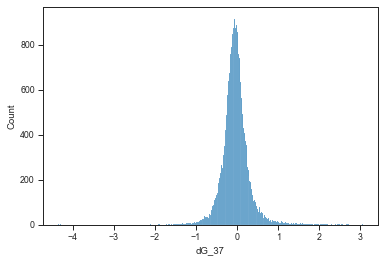

In [20]:
# Estimate between replicate std of ddG as a null
ddG_rep = arraydata.get_replicate_data('r1')['dG_37'] - arraydata.get_replicate_data('r3')['dG_37']
sns.histplot(ddG_rep)
print(ddG_rep.std())

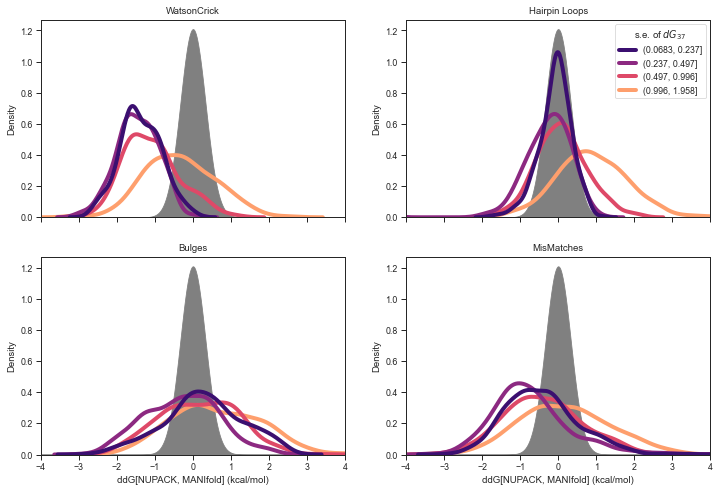

In [26]:
figures.plot_fig2_nupack_distance(salt, param='dG_37', suffix='_NUPACK_salt_corrected')
util.save_fig('./fig/Fig2/Fig2C_ddG_NUPACK_kdeplot_binned_dG_se_by_series.pdf')


ERROR! Session/line number was not unique in database. History logging moved to new session 296


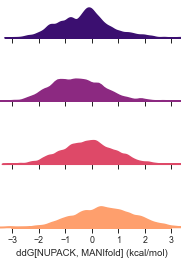

In [193]:
figures.plot_fig2_nupack_distance_ridge(salt, param='dG_37', suffix='_NUPACK_salt_corrected')
util.save_fig('./fig/Fig2/Fig2C_ddG_NUPACK_kdeplot_binned_dG_se_ridge.pdf')


### Actual ddG NUPACK zscores

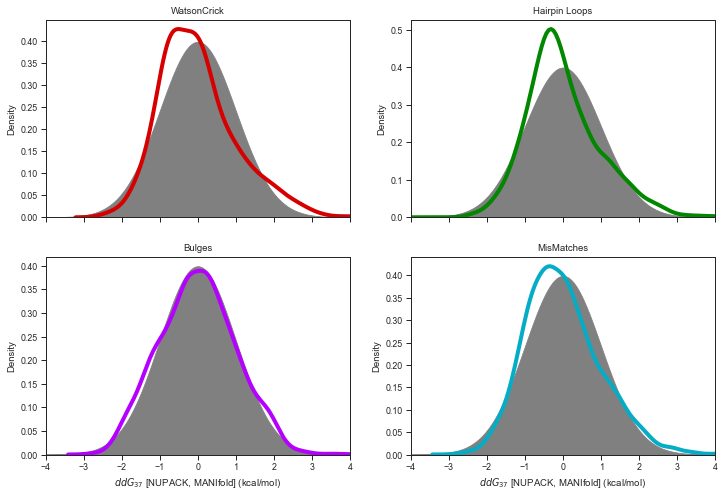

In [39]:
figures.plot_fig2_nupack_zscore(salt)

## % agree with NUPACK

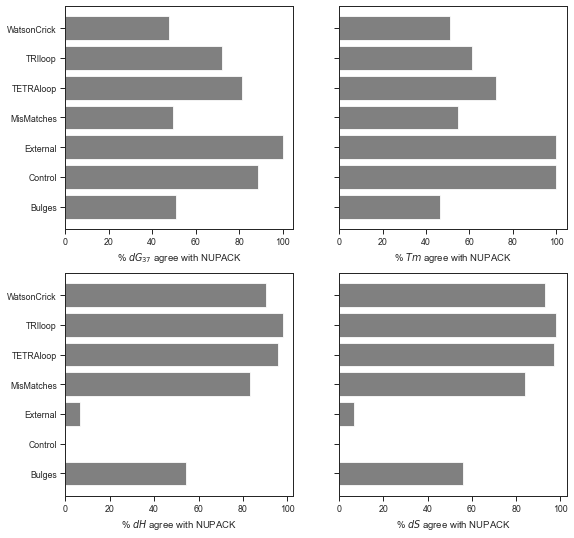

In [350]:
def plot_perc_agree_nupack(vf, param, annotation):
    df = pd.DataFrame(util.is_diff_nupack(vf, param), columns=[f'{param}_diff']).join(annotation)
    perc_agree_nupack = (1 - df.groupby('Series')[f'{param}_diff'].apply(sum) / df.groupby('Series')[f'{param}_diff'].apply(len)) * 100.0
    plt.barh(perc_agree_nupack.index, perc_agree_nupack, fill=True, color='grey')
    
    p = param
    if '_37' in p:
        p = p.replace('_37', '_{37}')
    plt.xlabel(f'% ${p}$ agree with NUPACK')
    return perc_agree_nupack
    
fig, ax = plt.subplots(2,2,figsize=(9,9), sharey=True)
ax = ax.flatten()
for i,param in enumerate(['dG_37', 'Tm', 'dH', 'dS']):
    plt.sca(ax[i])
    plot_perc_agree_nupack(salt, param, annotation)
    
util.save_fig('./fig/NUPACK/perc_agree_with_nupack_150mM.pdf')


# fig, ax = plt.subplots(2,2,figsize=(9,9), sharey=True)
# ax = ax.flatten()
# for i,param in enumerate(['dG_37', 'Tm', 'dH', 'dS']):
#     plt.sca(ax[i])
#     plot_perc_agree_nupack(arr, param, annotation)
    
# util.save_fig('./fig/NUPACK/perc_agree_with_nupack_75mM.pdf')

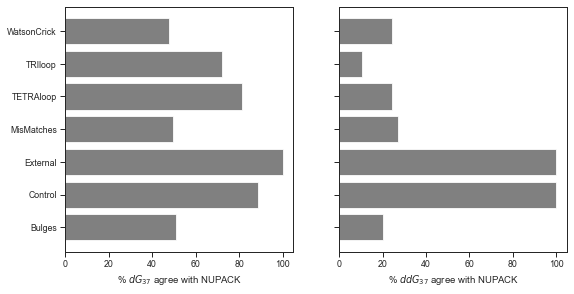

In [351]:
fig, ax = plt.subplots(1,2,figsize=(9,4.5), sharey=True)
ax = ax.flatten()
for i,param in enumerate(['dG_37', 'ddG_37']):
    plt.sca(ax[i])
    plot_perc_agree_nupack(salt, param, annotation)
    
util.save_fig('./fig/NUPACK/perc_agree_with_nupack_ddG_37_150mM.pdf')

## Breakdown by scaffold type

<AxesSubplot:xlabel='bottomScaffold', ylabel='dG_37'>

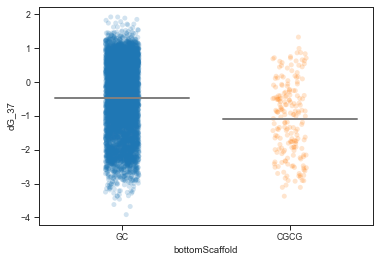

In [163]:
# data = salt.query('Series != "Controls" & Series != "External"')
data = arr.query('Series == "MisMatches"')
sns.stripplot(data=data, x='bottomScaffold', y='dG_37', 
              alpha=.2)
sns.boxplot(
            data=data, x='bottomScaffold', y='dG_37', 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'gray', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False,
            )

## Bae controls

In [1]:
%load_ext autoreload
%autoreload 2
%run nnn/ipynb_init.py
%matplotlib inline

In [2]:
arr = pd.read_csv('./data/models/raw/arr_v0.csv', index_col=0)

In [5]:
def find_mismatch_parent(s:str, ref:pd.Series):
    
    # found = False
    parent, tag = 'na', 'na'
    
    if s in ref.values:
        parent = ref[ref == s].index[0]
        tag = '-'
    
    
    for i,r in enumerate(ref):

        if len(s) == len(r):
            n_same, n_diff = 0, 0
            for j in range(len(r)):
                if s[j] == r[j]:
                    n_same += 1

            if n_same + 1 == len(r):
                found = True
                parent = ref.index[i]
                for j in range(len(r)):
                    if s[j] != r[j]:
                        tag = f'{r[j]}>{s[j]}'
                        break
                        
    return parent, tag

In [180]:
# import colorcet as cc
df = arr.query('ConstructType == "BaeControls"')
# df['stack'] = ['AAGCC', 'AACCA', 'TAACT'] * 2

# fig, ax = plt.subplots(1,2,figsize=(6,4))
# ax[0].errorbar(x=df.iloc[:3]['stack'], y=df.iloc[:3]['dG_37'], yerr=df.iloc[:3].dG_37_se, fmt='o', c='purple')
# ax[0].errorbar(x=df.iloc[3:]['stack'], y=df.iloc[3:]['dG_37'], yerr=df.iloc[3:].dG_37_se, fmt='o', c='orange')
# ax[0].legend(['CG','AGCT'], title='Scaffold')
# ax[0].set_ylabel('$dG_{37}$ (kcal/mol)')
# ax[0].set_title('MANIfold')

# ax[1].errorbar(x=df.iloc[:3]['stack'], y=df.iloc[:3]['dG_37_NUPACK_salt_corrected'],  fmt='o', c='purple')
# ax[1].errorbar(x=df.iloc[3:]['stack'], y=df.iloc[3:]['dG_37_NUPACK_salt_corrected'],  fmt='o', c='orange')
# ax[1].set_title('NUPACK')
# plt.ylabel('$dG_{37}$ (kcal/mol)')

# util.save_fig('./fig/Bae/dG_37.pdf')

In [38]:
# fig, ax = plt.subplots(figsize=(3,4))
# plt.errorbar(x=df.iloc[:3]['stack'], y=df.iloc[:3]['dG_37_ensemble_NUPACK'], fmt='o', c='purple')
# plt.errorbar(x=df.iloc[3:]['stack'], y=df.iloc[3:]['dG_37_ensemble_NUPACK'], fmt='o', c='orange')
# plt.legend(['CG','AGCT'], title='Scaffold')
# plt.ylabel('$dG_{37}$ (kcal/mol)')

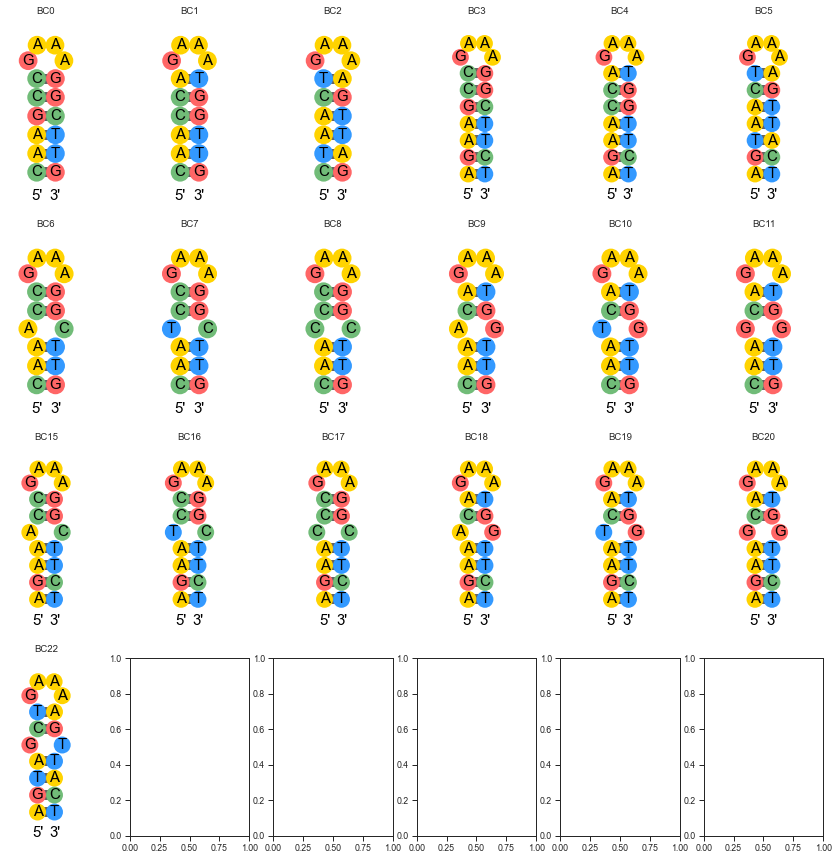

In [25]:
fig, ax = plt.subplots(4, 6, figsize=(15,15))
ax = ax.flatten()
j = 0
for i in range(23):
    seqid = 'BC%d'%i
    if seqid in df.index:
        draw_struct(df.loc[seqid, 'RefSeq'], df.loc[seqid, 'TargetStruct'], ax=ax[j])
        ax[j].set_title(seqid)
        j += 1
    
util.save_fig('./fig/Bae/structures.pdf')

In [181]:
# test finding parents of mismatches function
ref = df.loc[['BC%d'%i for i in range(6)],'RefSeq']
row = df.loc['BC7']
s = row.RefSeq
find_mismatch_parent(s, ref)

('BC0', 'G>T')

In [182]:
result = df.RefSeq.apply(lambda s: find_mismatch_parent(s, ref))
df[['parent', 'mismatch']] = np.array([list(x) for x in result.values])

In [183]:
bae_ddG = pd.read_table('./data/literature/Bae_mismatch.tsv', sep='\t').set_index('mismatch')

In [18]:
bae_ddG['37']

mismatch
G>A    3.980
G>C    4.614
G>T    4.060
T>A    2.735
T>C    3.076
T>G    1.604
Name: 37, dtype: float64

In [189]:
bae_compare = df.join(bae_ddG.loc[:,'37'], on='mismatch', how='left').dropna(subset=['37'])

bae_compare['parent_dG_37'] = bae_compare.parent.apply(lambda x: df.loc[x,'dG_37'])
bae_compare['parent_dG_37_se'] = bae_compare.parent.apply(lambda x: df.loc[x,'dG_37_se'])

bae_compare['ddG_37'] = bae_compare['dG_37'] - bae_compare['parent_dG_37']
bae_compare['ddG_37_se'] = bae_compare['dG_37_se'] + bae_compare['parent_dG_37_se']

mm_dict = {'G>A':0, 'G>T':1, 'G>C':2}
bae_compare['mismatch_index'] = bae_compare['mismatch'].apply(lambda x: mm_dict[x])
bae_compare['mismatch_index'] += [-.01]*3 + [.03]*3

In [190]:
bae_compare = bae_compare.iloc[-3:,]

In [192]:
bae_compare

dH     dH_se      dH_lb      dH_ub         Tm     Tm_se  \
SEQID                                                                   
BC6   -27.153302  2.723535 -37.091606 -21.747659  28.852944  0.769489   
BC7   -18.222723  6.639129 -39.536137 -10.463224  24.863581  2.276206   
BC8   -15.627578  7.321107 -36.741897  -8.785048  20.326311  2.005595   

           Tm_lb      Tm_ub     dG_37  dG_37_se  ...  \
SEQID                                            ...   
BC6    27.101364  31.096946  0.714467  0.125324  ...   
BC7    21.001542  32.396695  0.741754  0.434514  ...   
BC8    16.601931  26.893698  0.796639  0.498221  ...   

       dH_NUPACK_salt_corrected  dS_NUPACK_salt_corrected  parent  mismatch  \
SEQID                                                                         
BC6                       -29.0                 -0.088538     BC0       G>A   
BC7                       -29.5                 -0.090150     BC0       G>T   
BC8                       -27.1                 -0.084894     BC0       G>C   

          37  parent_dG_37  parent_dG_37_se    ddG_37  ddG_37_se  \
SEQID                                                              
BC6    3.980     -3.061226         0.496111  3.775693   0.621435   
BC7    4.060     -3.061226         0.496111  3.802980   0.930625   
BC8    4.614     -3.061226         0.496111  3.857865   0.994332   

       mismatch_index  
SEQID                  
BC6              0.03  
BC7              1.03  
BC8              2.03  

[3 rows x 50 columns]

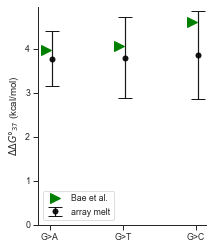

In [191]:
fig, ax = plt.subplots(figsize=(3,4))
plt.errorbar(x=bae_compare.mismatch_index, y=bae_compare.ddG_37, yerr= bae_compare.ddG_37_se,
             fmt='.', capsize=7, markersize=10, color='k', alpha=0.9, label='array melt')
plt.plot(np.arange(3)-0.05, bae_compare.iloc[:3,:]['37'], 'g>', markersize=10, label='Bae et al.')
plt.ylim(bottom=0)
plt.xticks(np.arange(3))
ax.set_xticklabels(mm_dict)
plt.legend()
sns.despine()
plt.ylabel('$\Delta \Delta G°_{37}$ (kcal/mol)')
util.save_fig('./fig/Bae/ddG_mismatch_compare.pdf')

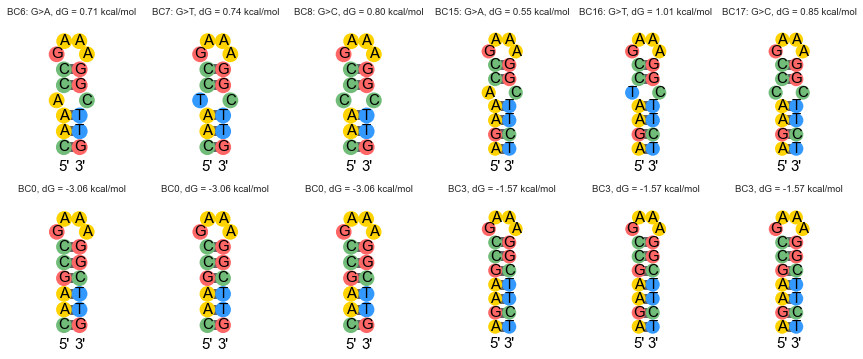

In [37]:
fig, ax = plt.subplots(2, 6, figsize=(15,6))
j = 0
for i in (6,7,8,15,16,17):
    seqid = 'BC%d'%i
    if seqid in df.index:
        draw_struct(df.loc[seqid, 'RefSeq'], df.loc[seqid, 'TargetStruct'], ax=ax[0][j])
        parent = df.loc[seqid, 'parent']
        draw_struct(df.loc[parent, 'RefSeq'], df.loc[parent, 'TargetStruct'], ax=ax[1][j])
        ax[0][j].set_title('%s: %s, dG_37 = %.2f kcal/mol' % (seqid, df.loc[seqid, "mismatch"], df.loc[seqid, "dG_37"]))
        ax[1][j].set_title('%s, dG_37 = %.2f kcal/mol' % (parent, df.loc[parent, "dG_37"]))
        j += 1
    
util.save_fig('./fig/Bae/structures_plotted.pdf')

### Plotting all the mismatches in the dataset

I realized that even the Bae controls are only remotely Bea-like... How about we just plot all the G>A mismatches in the dataset and call it a day?

In [193]:
def replace_at_index(s:str, newstring:str, idx:int):
    return s[:idx] + newstring + s[idx + 1:]
  
def find_mm_parent(seq, struct, arr):
    def get_parent_candidates(seq, struct):
        if '.(.' in struct:
            return None, None
        
        bp_dict = dict(A='T', C='G', T='A', G='C')
        idxmm = (('('+struct).find('((.(') + 1, (struct+')').find(').))') + 1)
        if idxmm[0] == 0 or idxmm[1] == 1:
            return None, None
        else:
            parent1 = replace_at_index(seq, bp_dict[seq[idxmm[0]]], idxmm[1])
            mm1 = bp_dict[seq[idxmm[0]]] + '>' + seq[idxmm[1]]
            parent2 = replace_at_index(seq, bp_dict[seq[idxmm[1]]], idxmm[0])
            mm2 = bp_dict[seq[idxmm[1]]] + '>' + seq[idxmm[0]]
            context = seq[idxmm[0]-1:idxmm[0]] + '.' + seq[idxmm[0]+1: idxmm[0]+2]
            return {parent1: mm1, parent2: mm2}, context
        
    parent_candidates, context = get_parent_candidates(seq, struct)
    
    if parent_candidates is None:
        return np.nan
    
    idx_parent = None
    for candidate in parent_candidates:
        try:
            idx_parent = arr.RefSeq.tolist().index(candidate)
            mm = parent_candidates[candidate]
        except:
            continue
            
    if idx_parent is None:
        return np.nan
    else:
        return (arr.iloc[idx_parent].name, mm, context)
    
def adjust_salt_dG_37(row):
    return util.get_Na_adjusted_dG_37(row.Tm, row.dH, row.GC, Na=0.160, from_Na=0.088)

row = arr.loc['BC16',:]   
find_mm_parent(row.RefSeq, row.TargetStruct, arr)

('BC3', 'G>T', 'A.C')

In [194]:
df = arr.query("ConstructType == 'BaeControls' | Series == 'MisMatches'")
df['parent'] = df.apply(lambda row: find_mm_parent(row.RefSeq, row.TargetStruct, arr), axis=1)
df.dropna(subset=['parent'], inplace=True)
df['mismatch'] = df.parent.apply(lambda x: x[1])
df['context'] = df.parent.apply(lambda x: x[2])
df['parent'] = df.parent.apply(lambda x: x[0])

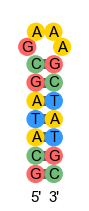

In [131]:
# sanity check the reference variant
# Yes it looks correct
row = arr.loc['MMTM177']
draw_struct(row.RefSeq, row.TargetStruct)

In [196]:
bae_compare = df.join(bae_ddG.loc[:,'37'], on='mismatch', how='left').dropna(subset=['37'])

bae_compare['parent_dG_37'] = bae_compare.parent.apply(lambda x: adjust_salt_dG_37(arr.loc[x,:]))
bae_compare['parent_dG_37_se'] = bae_compare.parent.apply(lambda x: arr.loc[x,'dG_37_se'])
bae_compare['dG_37_adjusted'] = adjust_salt_dG_37(bae_compare)
bae_compare['ddG_37'] = bae_compare['dG_37_adjusted'] - bae_compare['parent_dG_37']
bae_compare['ddG_37_se'] = bae_compare['dG_37_se'] + bae_compare['parent_dG_37_se']

# mm_dict = {'G>A':0, 'G>T':1, 'G>C':2}
# bae_compare['mismatch_index'] = bae_compare['mismatch'].apply(lambda x: mm_dict[x])
# bae_compare['mismatch_index'] += [-.01]*3 + [.03]*3

Text(0, 0.5, '$\\Delta \\Delta G°_{37}$ (kcal/mol)')

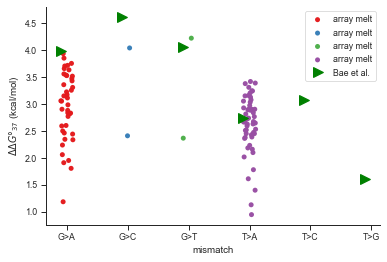

In [200]:
fig, ax = plt.subplots(figsize=(6,4))
sns.stripplot(data=bae_compare.query('context == "A.C"'), y='ddG_37', x='mismatch', 
              alpha=.98, palette='Set1',
              label='array melt')
plt.plot(np.arange(6)-0.1, bae_ddG['37'], 'g>', markersize=10, label='Bae et al.', zorder=10)
# plt.ylim(bottom=0)
plt.xticks(np.arange(6))
ax.set_xticklabels(bae_ddG.index)
plt.legend()
sns.despine()
plt.ylabel('$\Delta \Delta G°_{37}$ (kcal/mol)')

# Pick a WC 24 panel for validation

<AxesSubplot:xlabel='Tm_se', ylabel='Count'>

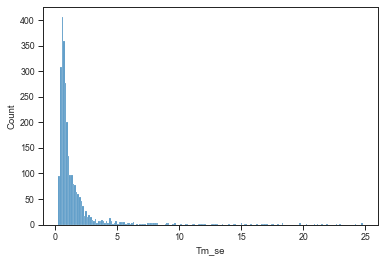

In [222]:
sns.histplot(arr.query('Series == "WatsonCrick"').Tm_se)

In [295]:
r2 = arraydata.get_replicate_data('r2')

Load from file ./data/fitted_variant/NNNlib2b_DNA_20211216_v9.CPvariant.gz
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


In [297]:
np.random.seed(42)
df = pd.concat(
    (arr.query('Series == "WatsonCrick"').sort_values(by='Tm_se').iloc[:12,:],
    arr.query('Series == "WatsonCrick"').query('Tm_se < 2.5').sample(15)), axis=0
).drop_duplicates().iloc[:24,:]

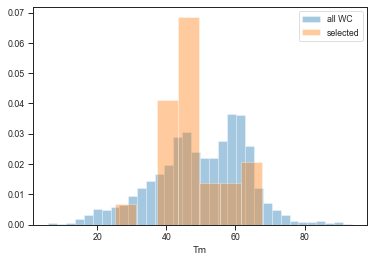

In [298]:
sns.distplot(arr.query('Series == "WatsonCrick"').Tm, norm_hist=True, kde=False, label='all WC')
sns.distplot(df.Tm, norm_hist=True, kde=False, label='selected')
plt.legend()

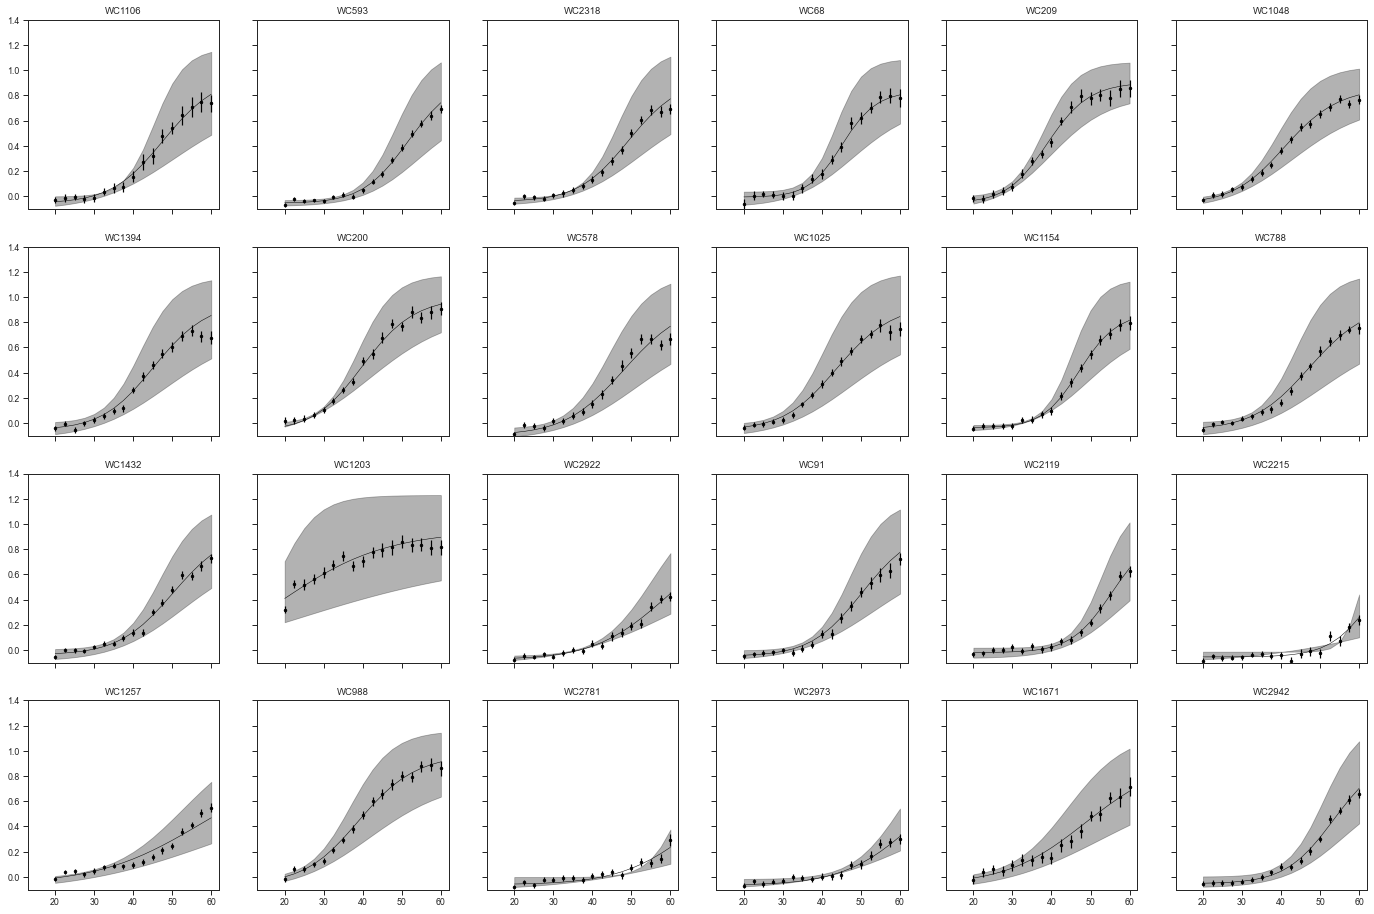

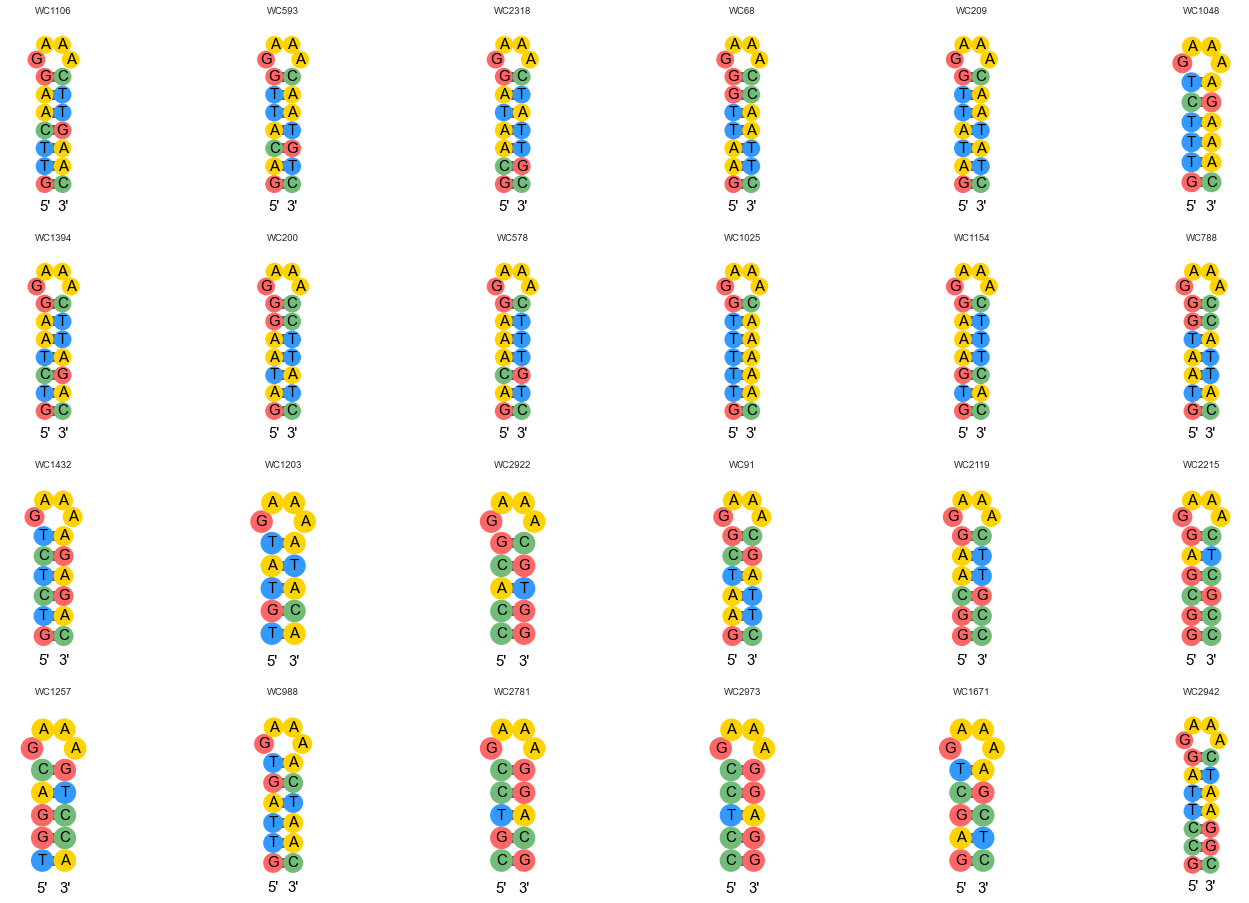

In [314]:
fig, ax = plt.subplots(4, 6, figsize=(24,16), sharey=True, sharex=True)
ax = ax.flatten()
r2_selected = r2.loc[df.index, :]
i = 0
for seqid,row in r2_selected.iterrows():
    plotting.plot_actual_and_expected_fit(row, ax[i])
    ax[i].set_title(seqid)
    i += 1

    
_, ax = plt.subplots(4, 6, figsize=(24,16))
ax = ax.flatten()
i = 0
for seqid,row in df.iterrows():
    draw_struct(row.RefSeq, row.TargetStruct, ax=ax[i])
    ax[i].set_title(seqid)
    i += 1
    
util.save_multi_image('./data/uv_melt/WC_24plate.pdf')

<AxesSubplot:xlabel='ConstructType', ylabel='Count'>

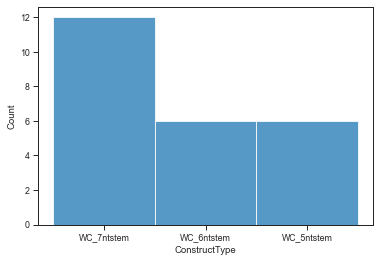

In [305]:
sns.histplot(df.ConstructType)

<AxesSubplot:xlabel='GC', ylabel='Count'>

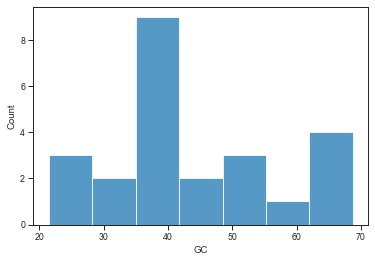

In [306]:
sns.histplot(df.GC)

In [313]:
df.to_csv('./data/uv_melt/WC_24plate_df.csv')

In [312]:
df[['RefSeq']].to_csv('./data/uv_melt/WC_24plate_sequence.csv')